# Imports and Utility Variables

In [120]:
import phoebe
from phoebe import u

import numpy as np
import matplotlib.pyplot as plt

import scienceplots
plt.style.use("science")

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
import analisis.phoebe_model.optimizers.opt_utils as opt_utils
importlib.reload(gen_utils)
importlib.reload(opt_utils)

logger = phoebe.logger(clevel='WARNING')

In [121]:
rawGaiaDatasets = ['lc_gaia_g_raw', 'lc_gaia_rp_raw', 'lc_gaia_bp_raw']
ztfDatasets = ['lcZtfG', 'lcZtfR']

allDatasetPlotGroups = [ztfDatasets, rawGaiaDatasets, ['lc_iturbide_norm']]

# Bundle Load and Prep

In [122]:
# b = phoebe.load("../estimations/bundle-saves/aviles-iturbide-gaia-ztf-ltt/ebai-estimates-trimmed")
# b = phoebe.load("../estimations/bundle-saves/aviles-iturbide-gaia-ztf-ltt-relative_norm/ebai-estimates-trimmed")

b = gen_utils.loadBundle("ebai-estimates-trimmed", parentFolder="../estimations", subfolder="updated-data")

In [123]:
print(b['compute_times'])

ParameterSet: 12 parameters
     compute_times@mesh01@dataset: [0.    0.025 0.05  ... 0.45  0.475 0.5  ] d
   compute_times@lc_iturbide_n...: [2459874.666677   2459874.67087434
 2459874.67507469 ...
 2459924.61304348 2459924.6172196
 2459924.62139537] d
C  compute_times@lc_gaia_g_raw...: [-0.14106834 -0.13689877 -0.13272919
 ...  0.18415854  0.18832812
  0.1924977 ] d
C  compute_times@lc_gaia_rp_ra...: [-0.14106834 -0.13689877 -0.13272919
 ...  0.18415854  0.18832812
  0.1924977 ] d
C  compute_times@lc_gaia_bp_ra...: [-0.14106834 -0.13689877 -0.13272919
 ...  0.18415854  0.18832812
  0.1924977 ] d
C    compute_times@lcZtfG@dataset: [-0.14106834 -0.13884457 -0.1366208  ...
  0.18805015  0.19027392  0.1924977 ] d
C    compute_times@lcZtfR@dataset: [-0.14106834 -0.13884457 -0.1366208  ...
  0.18805015  0.19027392  0.1924977 ] d
   compute_times@lc_gaia_g_raw...: phases_to_times({compute_phases@lc_gaia_g_raw@dataset}, {phases_period@lc_gaia_g_raw@dataset}, {period@binary@component}, {perio

100%|██████████| 407/407 [01:24<00:00,  4.81it/s]


before_optimizers
	 Gaia (Raw) - 13179.39132725304
		 lc_gaia_g_raw - 11176.21355006424
		 lc_gaia_rp_raw - 996.3525198118615
		 lc_gaia_bp_raw - 1006.8252573769383
------------------------------------------------
	 Iturbide (Norm) - 5254.494501389023
------------------------------------------------
	 ZTF - 16143.529056812346
		 lcZtfG - 5244.721730592295
		 lcZtfR - 10898.80732622005


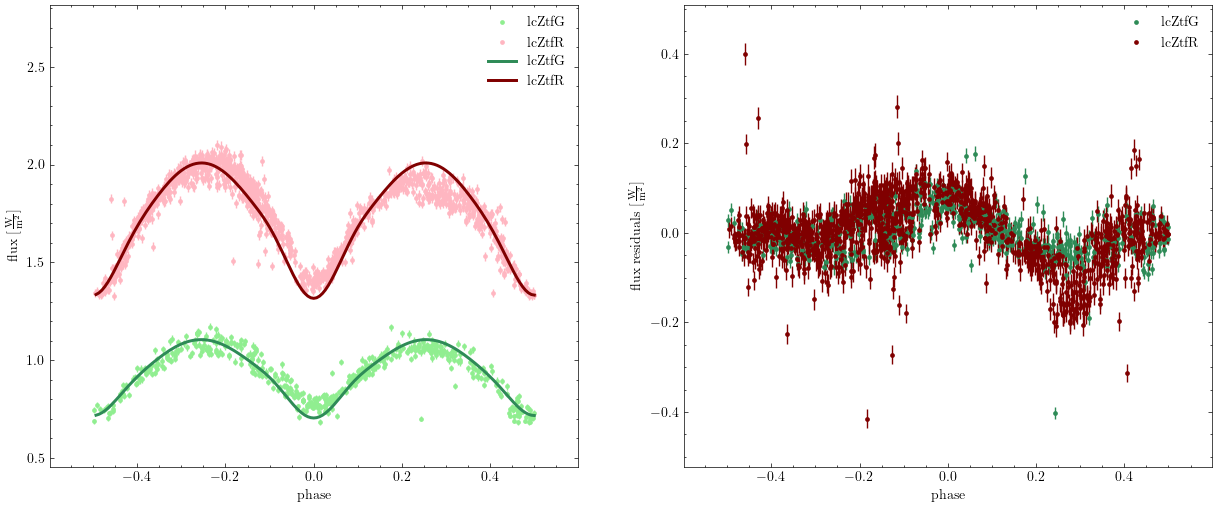

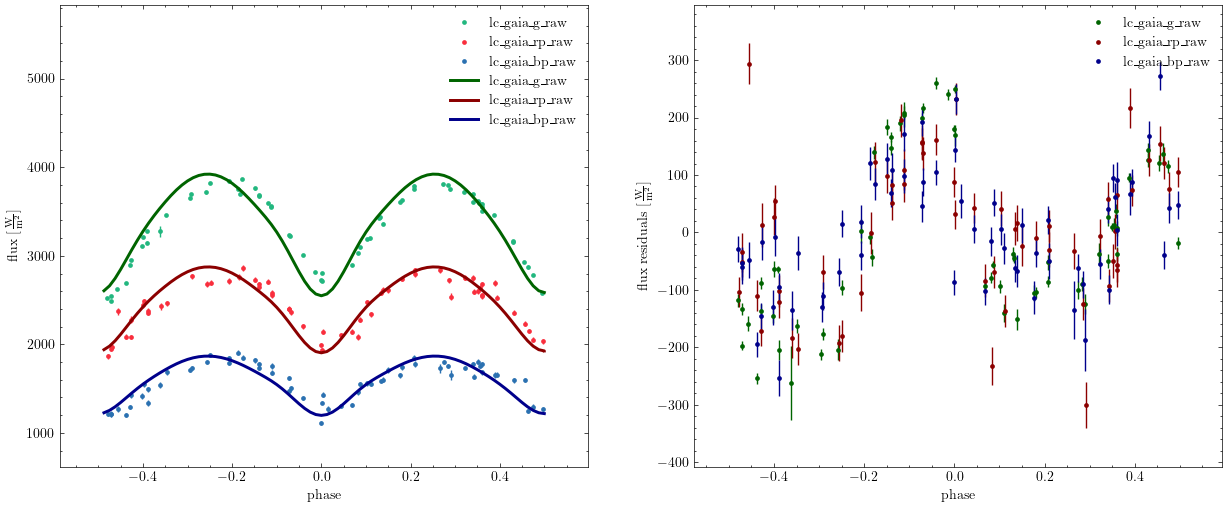

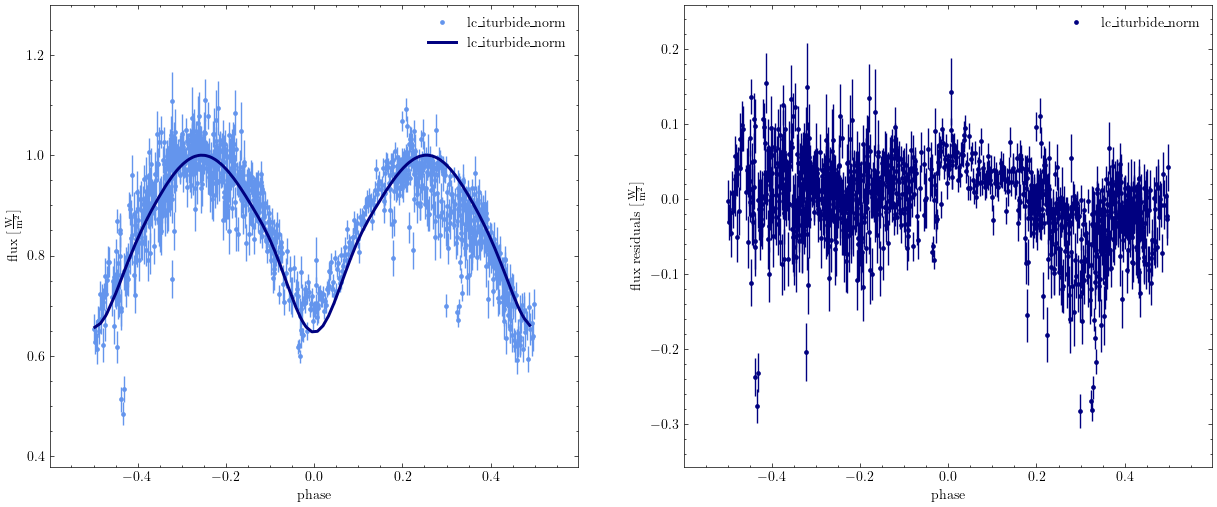

In [124]:
b.run_compute(model='before_optimizers', overwrite=True)
gen_utils.printChi2(b, 'before_optimizers')
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(15, 6), datasetGroups=allDatasetPlotGroups, model='before_optimizers')

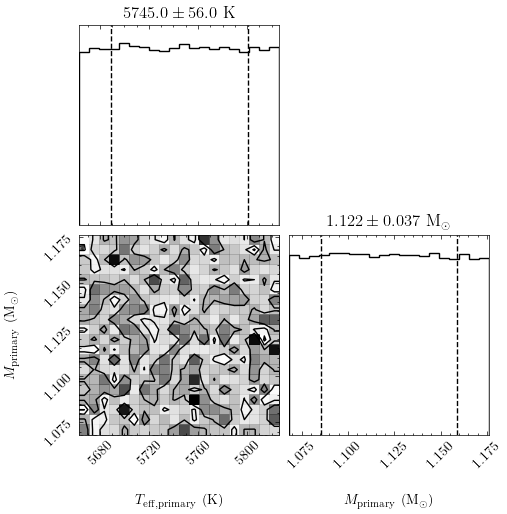

In [125]:
_ = b.plot_distribution_collection('poro_porb_bounds')

# Initial Parameters

## Sampling Poro Mass Distribution

Finding photometric solution using Poro empirical mass distribution. Primary component mass will be assumed to be sample.

In [126]:
poroDist, _ = b.get_distribution_collection('poro_porb_bounds')
_, massSample = poroDist.sample()
print(f"Sampled mass: {massSample}")
# b.set_value(qualifier='mass', component='primary', context='component', value=massSample)

# manually indirectly setting secondary's mass to sample
	# obtaining photometric solution for low mass components, to coincide with spectrum
	# true masses cannot be known without RV curve
primaryMass = massSample / b.get_value(qualifier='q')
b.set_value(qualifier='mass', component='primary', context='component', value=primaryMass)
b.run_all_constraints()
print(b['mass'])

Sampled mass: 1.1036201397616159
ParameterSet: 4 parameters
           mass@primary@component: 0.5707007947192273 solMass
C        mass@secondary@component: 1.1036201397616159 solMass
                  mass@constraint: (39.478418 * ({sma@binary@component} ** 3.000000)) / ((({period@binary@component} ** 2.000000) * ((1.000000 / {q@binary@component}) + 1.000000)) * 2942.206217504419328179210424423218)
   mass@poro_porb_bounds@distr...: <distl.uniform low=1.0683296468664136 high=1.1763645528088365 unit=solMass label=mass@primary label_latex=$M_\mathrm{ primary }$>


100%|██████████| 407/407 [01:24<00:00,  4.81it/s]


poro_sample
	 Gaia (Raw) - 13198.730159936167
		 lc_gaia_g_raw - 11194.257555368746
		 lc_gaia_rp_raw - 996.4099871143451
		 lc_gaia_bp_raw - 1008.0626174530767
------------------------------------------------
	 Iturbide (Norm) - 5258.324851363297
------------------------------------------------
	 ZTF - 16171.886879243746
		 lcZtfG - 5263.060886680665
		 lcZtfR - 10908.825992563081


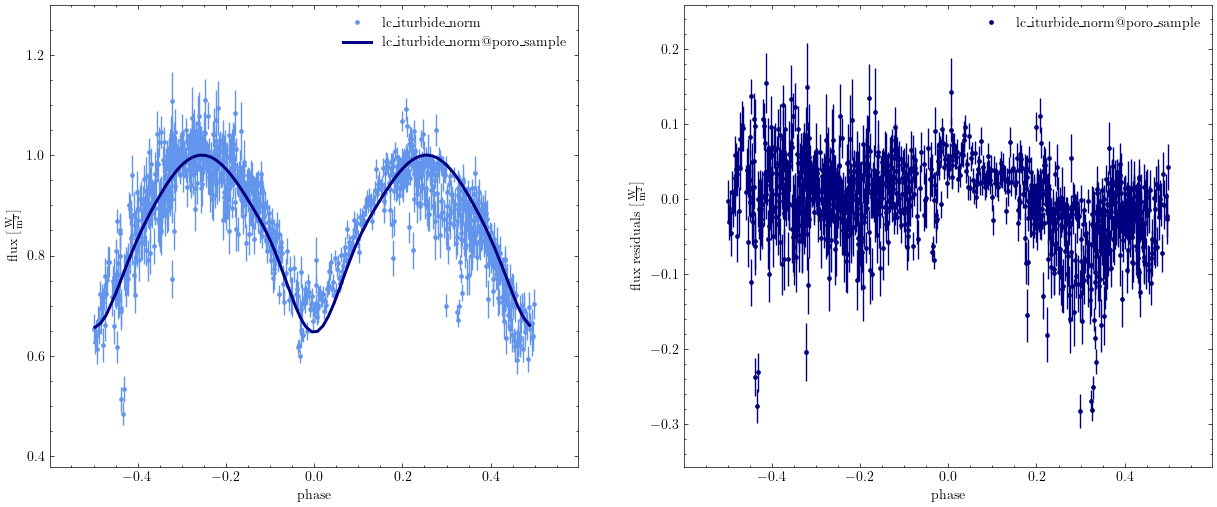

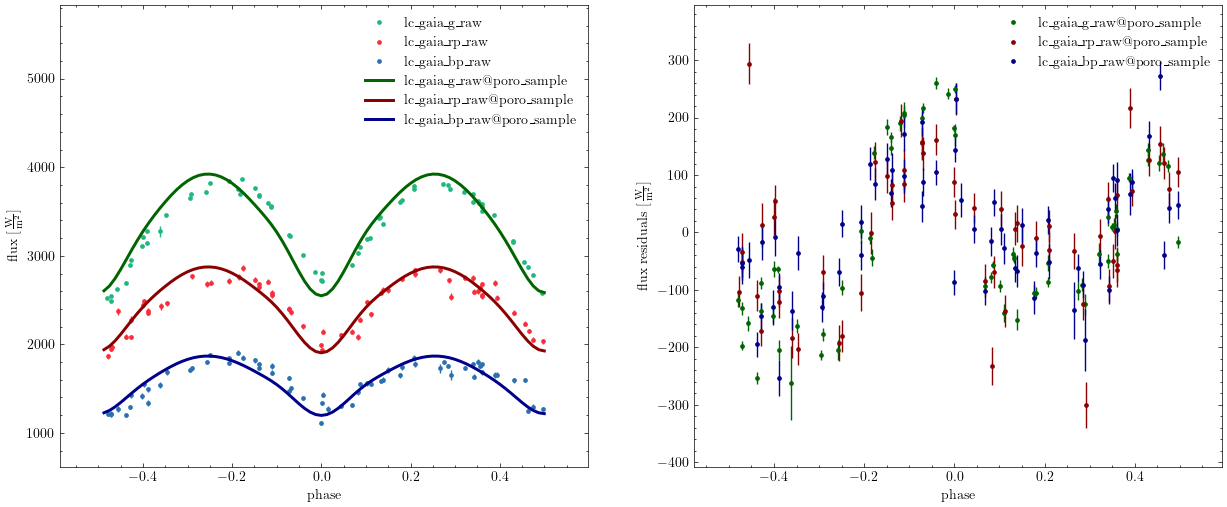

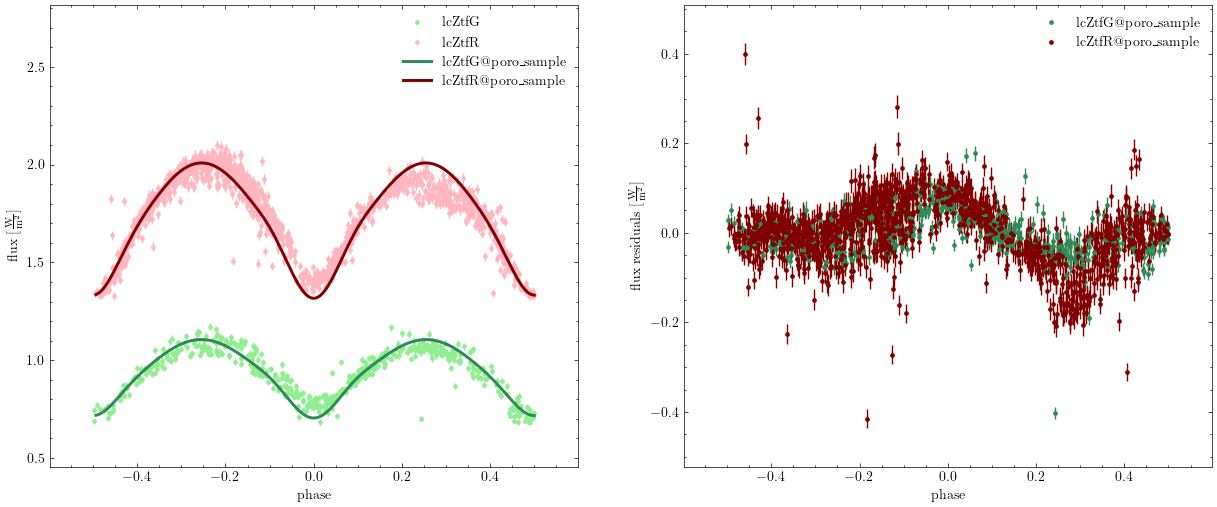

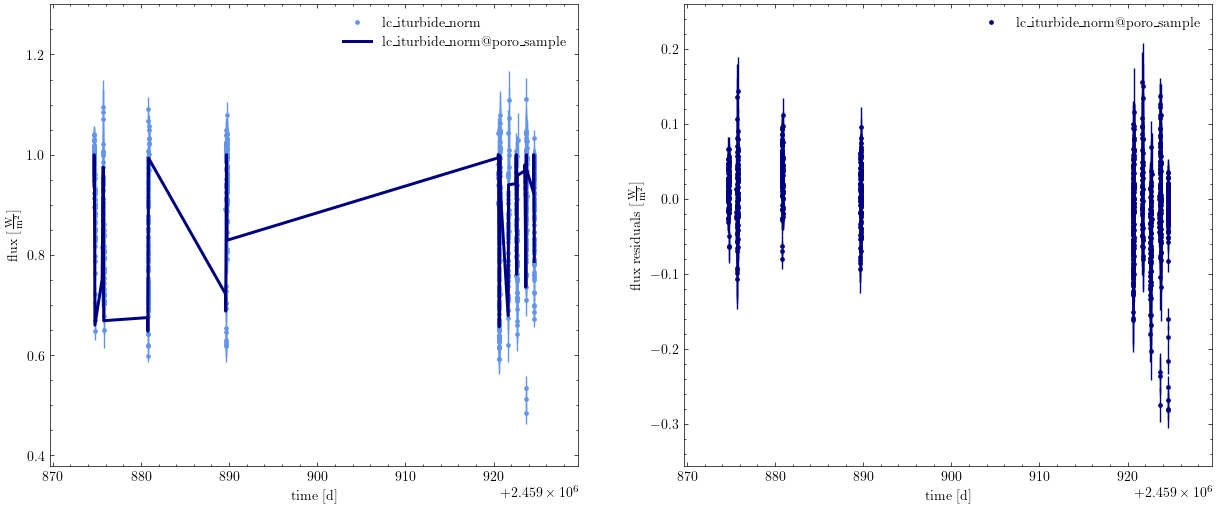

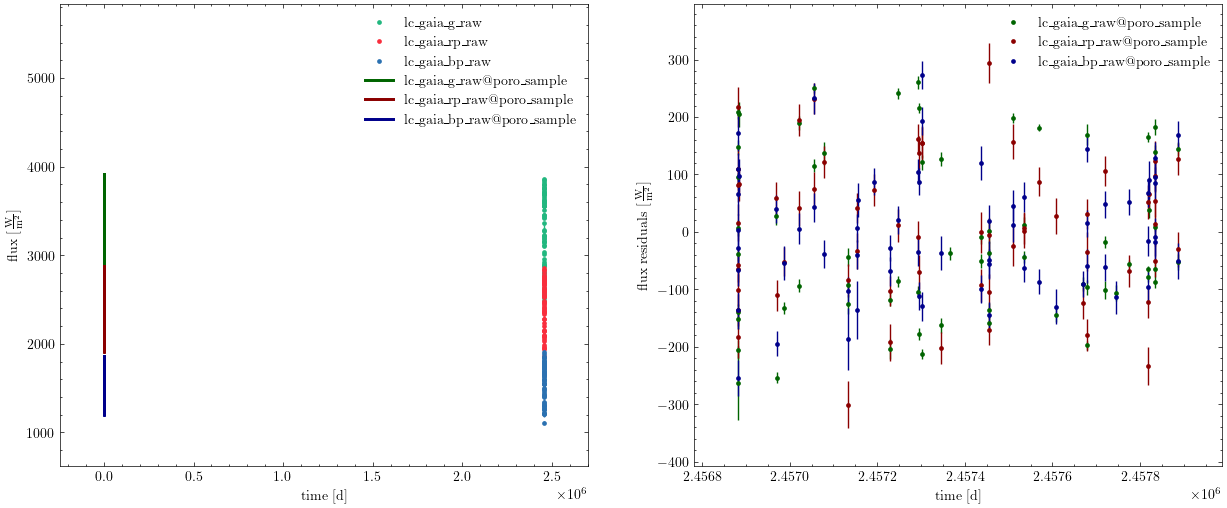

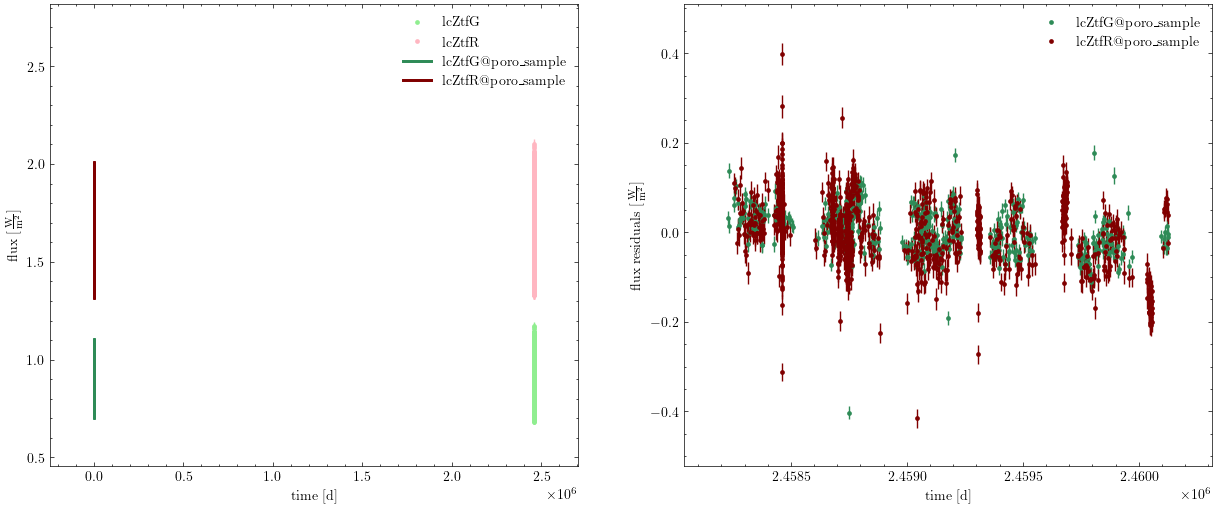

In [127]:
gen_utils.abilitateDatasets(b, ['lc_iturbide_norm'] + rawGaiaDatasets + ztfDatasets)
b.run_compute(model='poro_sample', overwrite=True)
gen_utils.printChi2(b, 'poro_sample')
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(15, 6), datasetGroups=[['lc_iturbide_norm'], rawGaiaDatasets, ztfDatasets], model='poro_sample')
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(15, 6), datasetGroups=[['lc_iturbide_norm'], rawGaiaDatasets, ztfDatasets], model='poro_sample', phase=False)

In [128]:
print(b['q'])
print(b['mass'])
print(b['requiv'])
print(b['teff'])
print(b['teffratio'])
print(b['fillout_factor'])
print(b['incl@binary'])

Parameter: q@binary@component
                       Qualifier: q
                     Description: Mass ratio
                           Value: 1.9337981477747437
                  Constrained by: 
                      Constrains: requiv@primary@component, requiv@secondary@component, pot@contact_envelope@component, pot_min@contact_envelope@component, pot_max@contact_envelope@component, sma@binary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, requiv_min@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, requiv_max@secondary@component, requiv_min@secondary@component
                      Related to: pot@contact_envelope@component, sma@binary@component, requiv@primary@component, requiv@secondary@component, fillout_factor@contact_envelope@component, pot_min@contact_envelope@component, pot_max@contact_envelope@component, mass@primary@component, period@binary@component, sma@primary@component, incl@bina

# `t0_supconj`

Eclipse timings look off from model to light curves, from slight positional offset.

100%|██████████| 407/407 [01:25<00:00,  4.77it/s]


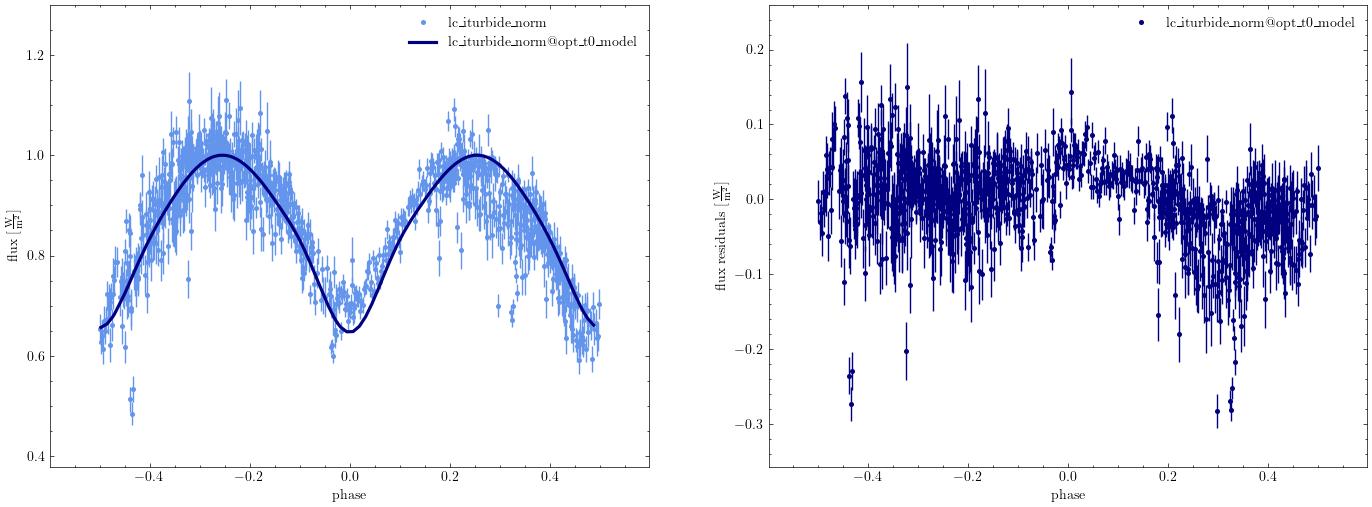

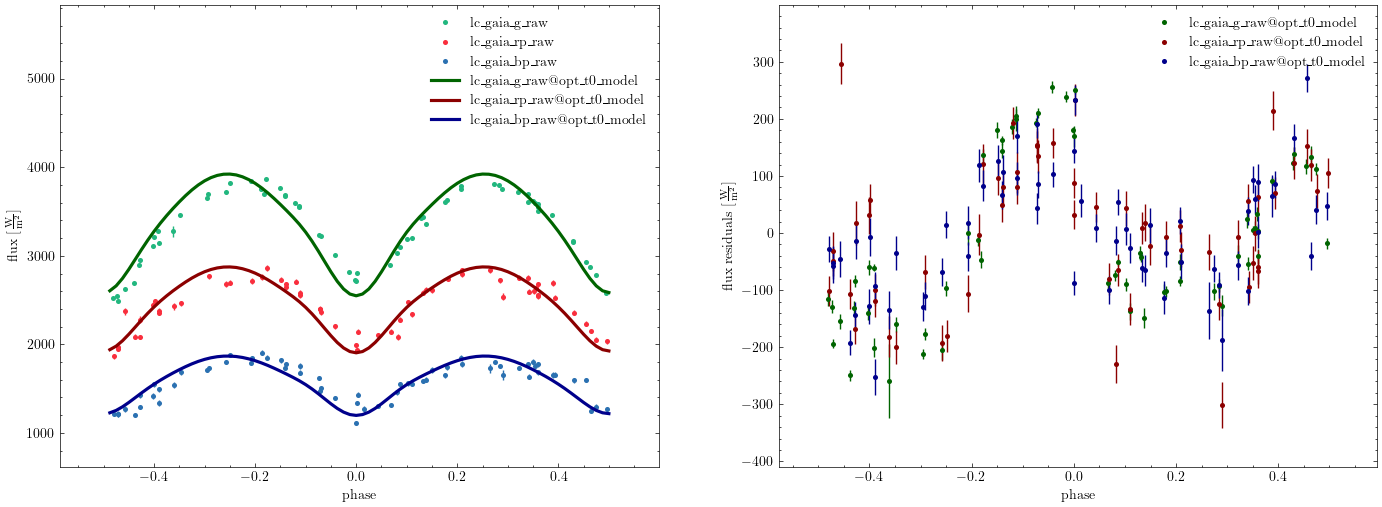

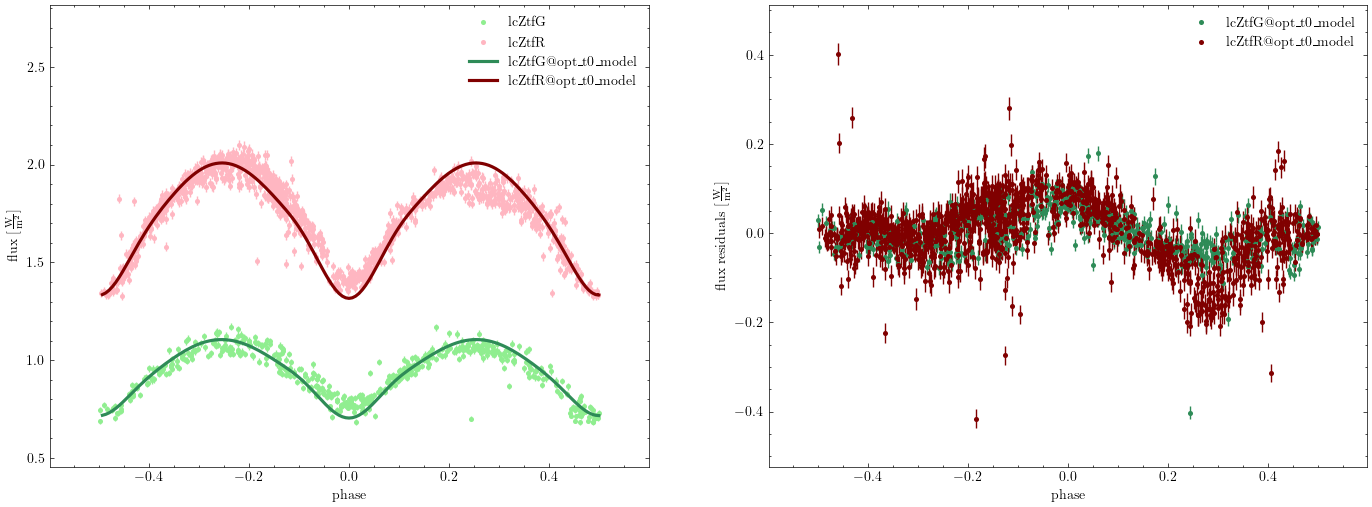

In [129]:
# opt_utils.optimize_params(b, fit_twigs=['t0_supconj'], label='t0', export=False, datasets=ztfDatasets, maxiter=50)

gen_utils.abilitateDatasets(b, ['lc_iturbide_norm'] + rawGaiaDatasets + ztfDatasets)
b.set_value(qualifier='t0_supconj', value=0.02589*u.day) # result of above optimizer
b.run_compute(model='opt_t0_model', overwrite=True)
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(17, 6), datasetGroups=[['lc_iturbide_norm'], rawGaiaDatasets, ztfDatasets], model='opt_t0_model')

In [130]:
%%script echo "skipping; already ran and hard-coded above"
gen_utils.abilitateDatasets(b, ['lc_iturbide_norm'] + rawGaiaDatasets + ztfDatasets)
# solutionName, computeModelName = opt_utils.adopt_solution(b, solution_file="./external-jobs/iturbide-gaia-ztf-ltt/results/opt_per_t0_solution", reset_params=False)
# solutionName, computeModelName = opt_utils.adopt_solution(b, solution_file="./external-jobs/updated-data/results/opt_per_t0_solution", reset_params=False)
# solutionName, computeModelName = opt_utils.adopt_solution(b, solution_file="./external-jobs/updated-data/results/opt_t0_solution", reset_params=True)
solutionName, computeModelName = opt_utils.adopt_solution(b, label='t0', reset_params=False)
gen_utils.printAllModelsChi2(b)
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(17, 6), datasetGroups=[['lc_iturbide_norm'], rawGaiaDatasets, ztfDatasets], model=computeModelName)

skipping; already ran and hard-coded above


<!-- # Eclipse Width and Depth

Adjusting $T_{eff}$ ratio (`teffratio`) based on eclipse depths, alongside the fillout factor (`fillout_factor`) to adjust the eclipse widths. Fillout factor
parametrization of component radii. -->
# NM Optimization

Adjusting parameters that affect general shape of LC. Using only ZTF data since it's the cleanest.

In [131]:
# opt_utils.optimize_params(b, ['teffratio', 'fillout_factor'], "teffr_ff", export=True, subfolder="updated-data", datasets=ztfDatasets, maxiter=200)
opt_utils.optimize_params(b, fit_twigs=['teffratio', 'fillout_factor', 'incl@binary', 'q'], label="nm_all", 
                          export=True, subfolder="updated-data", datasets=ztfDatasets, maxiter=200)

External Solver: ./external-jobs/updated-data/optimizer.nelder_mead_opt_nm_all.py ./results/opt_nm_all_solution


('opt_nm_all', 'opt_nm_all_solution')

In [132]:
print(b['*bol*'])

ParameterSet: 14 parameters
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@primary@component: lookup
    ld_func_bol@primary@component: logarithmic
   ld_coeffs_source_bol@primar...: auto
    gravb_bol@secondary@component: 0.32
   irrad_frac_refl_bol@seconda...: 0.6
C  irrad_frac_lost_bol@seconda...: 0.4
   ld_mode_bol@secondary@compo...: lookup
   ld_func_bol@secondary@compo...: logarithmic
   ld_coeffs_source_bol@second...: auto
   irrad_frac_lost_bol@primary...: 1.000000 - {irrad_frac_refl_bol@primary@component}
   irrad_frac_lost_bol@seconda...: 1.000000 - {irrad_frac_refl_bol@secondary@component}


In [133]:
print(b['irrad_frac_refl_bol@primary'])
print(b['irrad_frac_lost_bol@primary@component'])
print(b['irrad_method'])
print(b['gravb_bol@primary'])

Parameter: irrad_frac_refl_bol@primary@component
                       Qualifier: irrad_frac_refl_bol
                     Description: ratio of incident bolometric light that is used for reflection/irradiation (heating without redistribution)
                           Value: 0.6
                  Constrained by: 
                      Constrains: irrad_frac_lost_bol@primary@component
                      Related to: irrad_frac_lost_bol@primary@component

Parameter: irrad_frac_lost_bol@primary@component
                       Qualifier: irrad_frac_lost_bol
                     Description: ratio of incident bolometric light that is lost/ignored
                           Value: 0.4
                  Constrained by: irrad_frac_refl_bol@primary@component
                      Constrains: None
                      Related to: irrad_frac_refl_bol@primary@component

Parameter: irrad_method@phoebe01@compute
                       Qualifier: irrad_method
                     Description: 

Adopted:
teffratio@binary@orbit@component 1.07991  
fillout_factor@contact_envelope@envelope@component 0.09356  
incl@binary@orbit@component 70.19810 deg 
q@binary@orbit@component 2.13478  

Original values:
  teffratio@binary@orbit@component 0.98746 
  fillout_factor@contact_envelope@envelope@component 0.25767 
  incl@binary@orbit@component 70.31953 deg 
  q@binary@orbit@component 1.93380 


100%|██████████| 407/407 [01:32<00:00,  4.41it/s]


before_optimizers
	 Gaia (Raw) - 13179.391625955395
		 lc_gaia_g_raw - 11176.21383724974
		 lc_gaia_rp_raw - 996.3525261709403
		 lc_gaia_bp_raw - 1006.8252625347158
------------------------------------------------
	 Iturbide (Norm) - 5254.494483017592
------------------------------------------------
	 ZTF - 16143.529065239905
		 lcZtfG - 5244.7217304115175
		 lcZtfR - 10898.807334828387
poro_sample
	 Gaia (Raw) - 13198.730458784532
		 lc_gaia_g_raw - 11194.257842692314
		 lc_gaia_rp_raw - 996.4099934724072
		 lc_gaia_bp_raw - 1008.0626226198111
------------------------------------------------
	 Iturbide (Norm) - 5258.324832963756
------------------------------------------------
	 ZTF - 16171.886887637465
		 lcZtfG - 5263.060886486252
		 lcZtfR - 10908.826001151214
opt_t0_model
	 Gaia (Raw) - 12793.877039457688
		 lc_gaia_g_raw - 10827.301256273857
		 lc_gaia_rp_raw - 976.8565376779175
		 lc_gaia_bp_raw - 989.7192455059132
------------------------------------------------
	 Iturbide (No

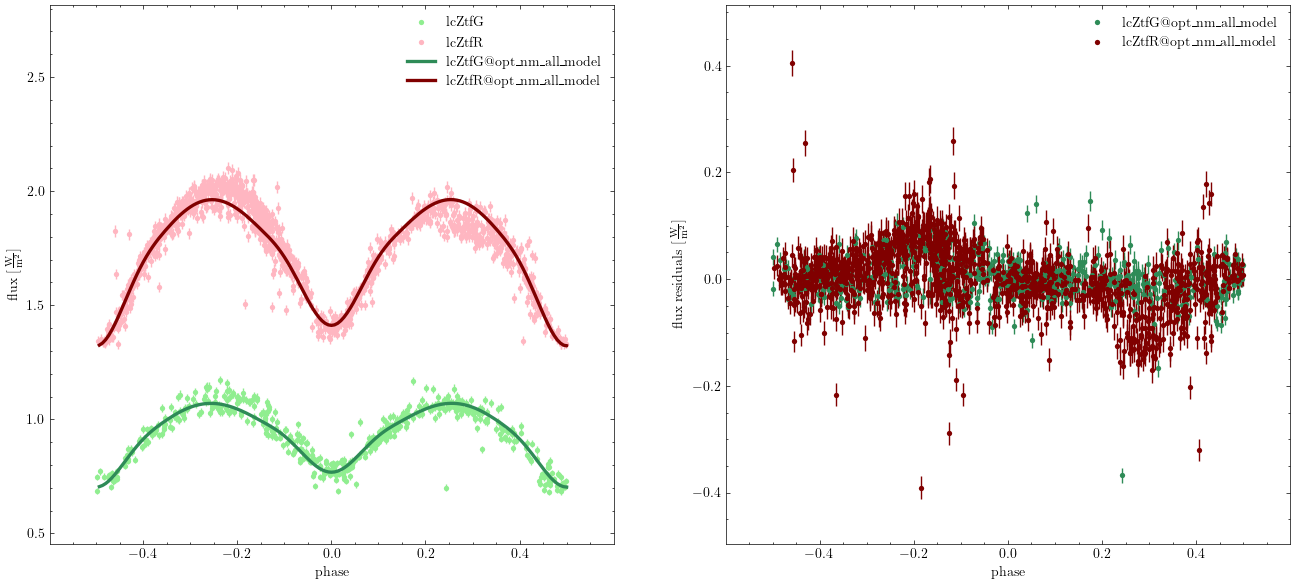

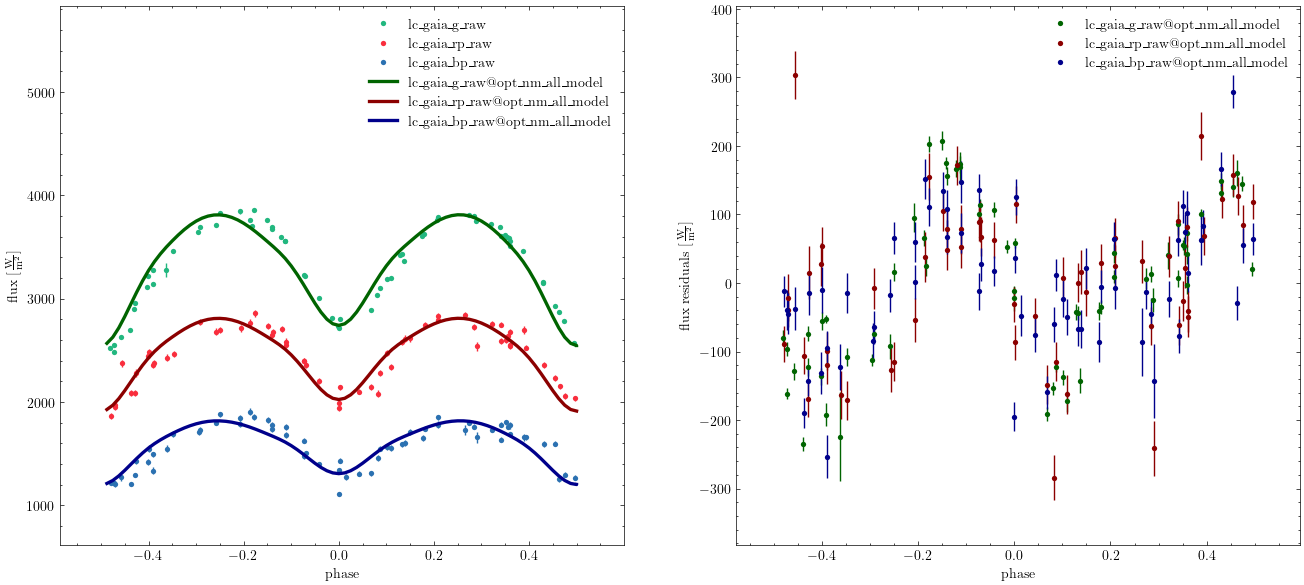

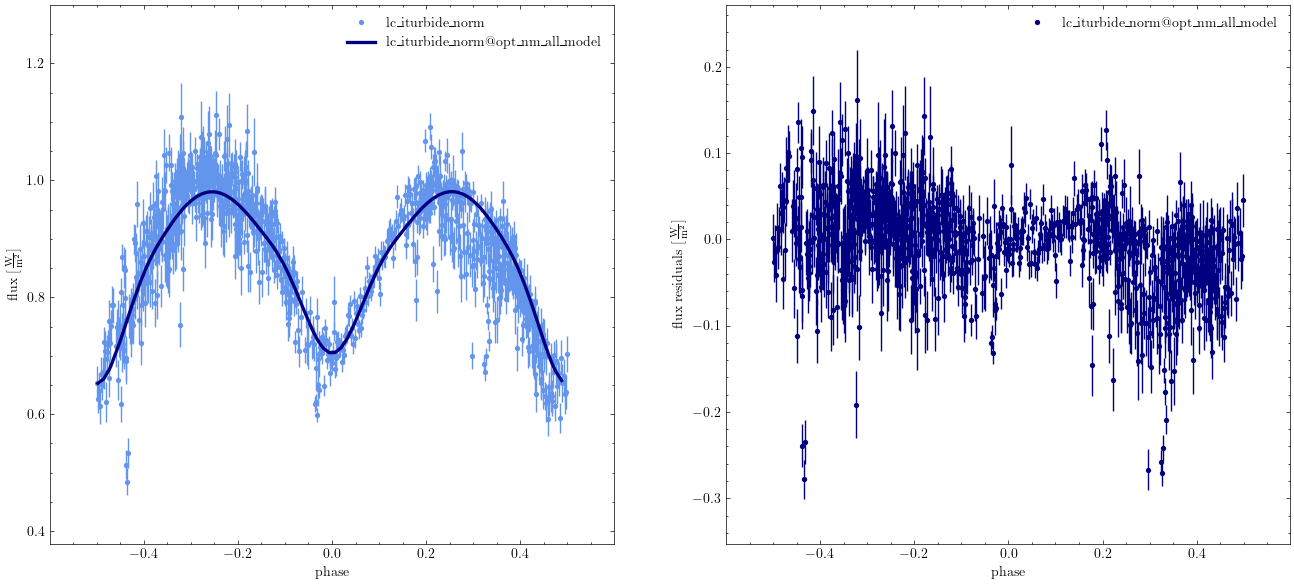

In [134]:
gen_utils.abilitateDatasets(b, ['lc_iturbide_norm'] + rawGaiaDatasets + ztfDatasets)
solutionName, computeModelName = opt_utils.adopt_solution(b, solution_file="./external-jobs/updated-data/results/opt_nm_all_solution", reset_params=False)

gen_utils.printAllModelsChi2(b)
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(16, 7), datasetGroups=allDatasetPlotGroups, model=computeModelName)

In [135]:
print(b['opt_nm_all_solution'])

ParameterSet: 11 parameters
R  fitted_twigs@phoebe01@opt_n...: ['teffratio@binary@orbit@component'
 'fillout_factor@contact_envelope@envelope@component'
 'incl@binary@orbit@component' 'q@binary@orbit@component']
   adopt_parameters@phoebe01@o...: ['teffratio@binary@orbit@component', 'fillout_factor@contact_envelope@envelope@component', 'incl@binary@orbit@component', 'q@binary@orbit@component']
   adopt_distributions@phoebe0...: False
   adopt_values@phoebe01@opt_n...: True
R  message@opt_nm_all_solution...: Optimization terminated successfully.
R  niter@opt_nm_all_solution@s...: 114
R  success@opt_nm_all_solution...: True
R  initial_values@opt_nm_all_s...: [0.9874568627998106 0.2576708187986845 70.31952619903458
 1.9337981477747437]
R  fitted_values@phoebe01@opt_...: [1.0799145032852362 0.09355792126494729 70.19809817084013
 2.1347822302806985]
R  fitted_units@phoebe01@opt_n...: ['' '' 'deg' '']
   comments@phoebe01@opt_nm_al...: 


# Sunspot Feature

Including a starspot to account for *O'Connell effect* seen in ZTF LCs.

In [136]:
b.flip_constraint(qualifier='compute_phases', dataset='mesh01', solve_for='compute_times')

<ConstraintParameter: {compute_times@mesh01@dataset} = phases_to_times({compute_phases@mesh01@dataset}, {phases_period@mesh01@dataset}, {period@binary@component}, {period_anom@binary@component}, {phases_dpdt@mesh01@dataset}, {dpdt@binary@component}, {phases_t0@mesh01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component}) (solar units) => [ 0.          0.025       0.05        0.075       0.1         0.125
  0.15        0.175      -0.13356604 -0.10856604 -0.08356604 -0.05856604
 -0.03356604 -0.00856604  0.01643396  0.04143396  0.06643396  0.09143396
  0.11643396  0.14143396  0.16643396] d>

In [137]:
b.set_value(qualifier='compute_phases', dataset='mesh01', context='dataset', value=phoebe.linspace(-0.5, 0.5, 21))
print(b.get_value(qualifier='compute_phases', dataset='mesh01'))

[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]


In [138]:
gen_utils.abilitateDatasets(b, [])
b.run_compute(model='updated_mesh_phases', overwrite=True)

100%|██████████| 21/21 [00:04<00:00,  4.56it/s]


<ParameterSet: 213 parameters | components: secondary, primary>

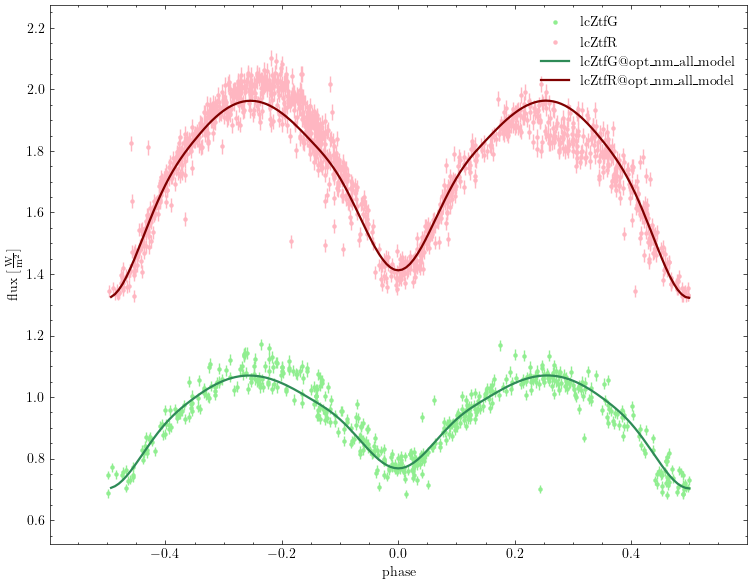

Sat, 03 Aug 2024 09:29 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.109282, assuming named color
Sat, 03 Aug 2024 09:29 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.109282, assuming named color


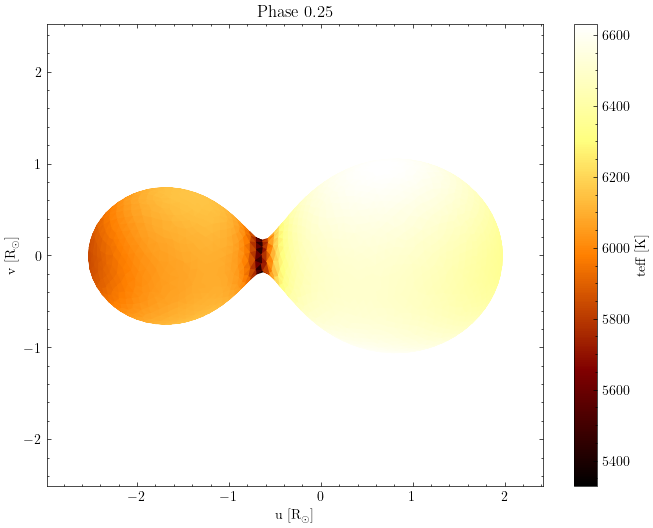

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 2 Axes>)

In [139]:
phase = 0.25
fig = plt.figure(figsize=(9, 7))
b.plot(x='phase', dataset=ztfDatasets, model='opt_nm_all_model', color=gen_utils.ZTF_PLOT_COLORS, marker={'dataset': '.'}, ls={'model': 'solid'}, fig=fig, legend=True, s=0.009, show=True)
b.plot(dataset='mesh01', kind='mesh', fc='teffs', ec='face', phase=phase, draw_sidebars=True, model='updated_mesh_phases', show=True, title=f"Phase {phase}", draw_title=True)

## Secondary Spot

100%|██████████| 161/161 [00:36<00:00,  4.42it/s]
Sat, 03 Aug 2024 09:29 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.109282, assuming named color
Sat, 03 Aug 2024 09:29 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.109282, assuming named color


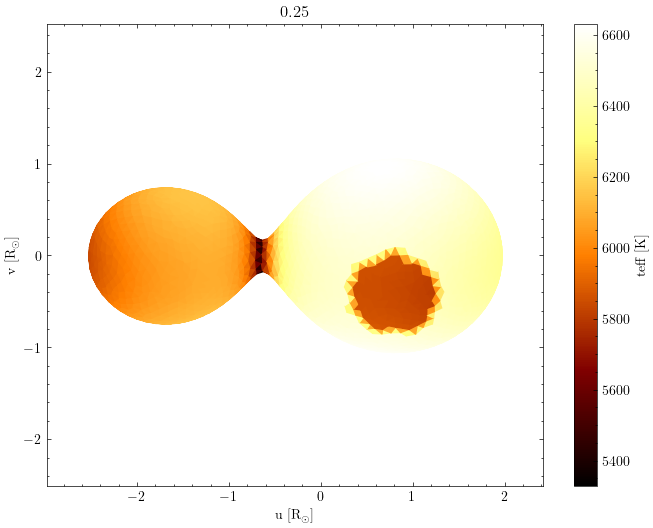

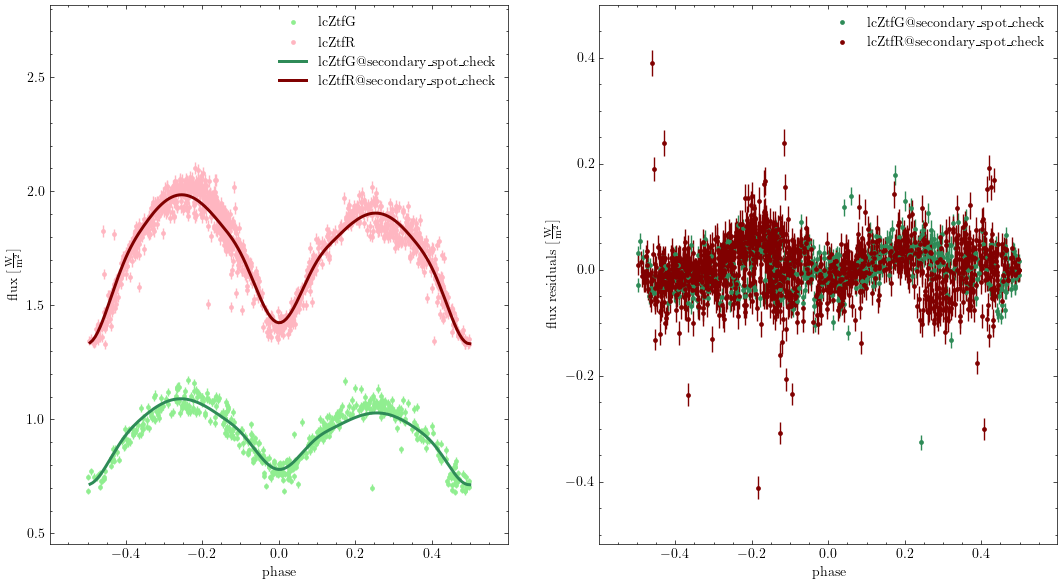

{'lcZtfG-lcZtfR': <Figure size 1300x700 with 2 Axes>}

In [140]:
# initial conditions for secondary spot; rough estimates based on light curve shape, giving the optimizer a starting point
gen_utils.abilitateDatasets(b, ztfDatasets, includeMesh=True)

b.remove_features_all()
b.add_spot(component='secondary', feature='secondary_spot', overwrite=True)
b.set_value(qualifier='relteff', feature='secondary_spot', value=0.9)
b.set_value(qualifier='radius', feature='secondary_spot', value=25)
b.set_value(qualifier='colat', feature='secondary_spot', value=85)
b.set_value(qualifier='long', feature='secondary_spot', value=90)

b.run_compute(model='secondary_spot_check', overwrite=True)

plotPhase = 0.25
b.plot(dataset='mesh01', phase=plotPhase, model='secondary_spot_check', fc='teffs', ec='face', show=True, draw_sidebars=True, title=str(plotPhase), draw_title=True)
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[ztfDatasets], model='secondary_spot_check')

In [141]:
gen_utils.printAllModelsChi2(b)

before_optimizers
	 Gaia (Raw) - 13179.391625955395
		 lc_gaia_g_raw - 11176.21383724974
		 lc_gaia_rp_raw - 996.3525261709403
		 lc_gaia_bp_raw - 1006.8252625347158
------------------------------------------------
	 Iturbide (Norm) - 5254.494483017592
------------------------------------------------
	 ZTF - 16143.529065239905
		 lcZtfG - 5244.7217304115175
		 lcZtfR - 10898.807334828387
poro_sample
	 Gaia (Raw) - 13198.730458784532
		 lc_gaia_g_raw - 11194.257842692314
		 lc_gaia_rp_raw - 996.4099934724072
		 lc_gaia_bp_raw - 1008.0626226198111
------------------------------------------------
	 Iturbide (Norm) - 5258.324832963756
------------------------------------------------
	 ZTF - 16171.886887637465
		 lcZtfG - 5263.060886486252
		 lcZtfR - 10908.826001151214
opt_t0_model
	 Gaia (Raw) - 12793.877039457688
		 lc_gaia_g_raw - 10827.301256273857
		 lc_gaia_rp_raw - 976.8565376779175
		 lc_gaia_bp_raw - 989.7192455059132
------------------------------------------------
	 Iturbide (No

In [142]:
opt_utils.optimize_params(b, fit_twigs=['colat@secondary_spot', 'long@secondary_spot', 'radius@secondary_spot', 'relteff@secondary_spot'], 
						  label='secondary_spot', export=True, subfolder="updated-data", datasets=ztfDatasets, maxiter=250)

External Solver: ./external-jobs/updated-data/optimizer.nelder_mead_opt_secondary_spot.py ./results/opt_secondary_spot_solution


('opt_secondary_spot', 'opt_secondary_spot_solution')

In [143]:
print(b['opt_secondary_spot_solution'])

ParameterSet: 0 parameters
NO PARAMETERS


In [144]:
gen_utils.abilitateDatasets(b, ztfDatasets)
# solutionName, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file="./external-jobs/iturbide-gaia-ztf-relative_norm/results/opt_secondary_spot_solution")
solutionName, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file="./external-jobs/updated-data/results/opt_secondary_spot_solution")

Sat, 03 Aug 2024 09:29 BUNDLE       WARNING not all uniqueids in fitted_uniqueids@opt_secondary_spot_solution@solution are still valid.  Falling back on twigs.  Save and load same bundle to prevent this extra cost.


Adopted:
colat@secondary_spot@secondary@spot@feature 89.77983 deg 
long@secondary_spot@secondary@spot@feature 81.09966 deg 
radius@secondary_spot@secondary@spot@feature 25.12086 deg 
relteff@secondary_spot@secondary@spot@feature 0.93007  

Original values:
  colat@secondary_spot@secondary@spot@feature 85.00000 deg 
  long@secondary_spot@secondary@spot@feature 90.00000 deg 
  radius@secondary_spot@secondary@spot@feature 25.00000 deg 
  relteff@secondary_spot@secondary@spot@feature 0.90000 


100%|██████████| 161/161 [00:37<00:00,  4.29it/s]


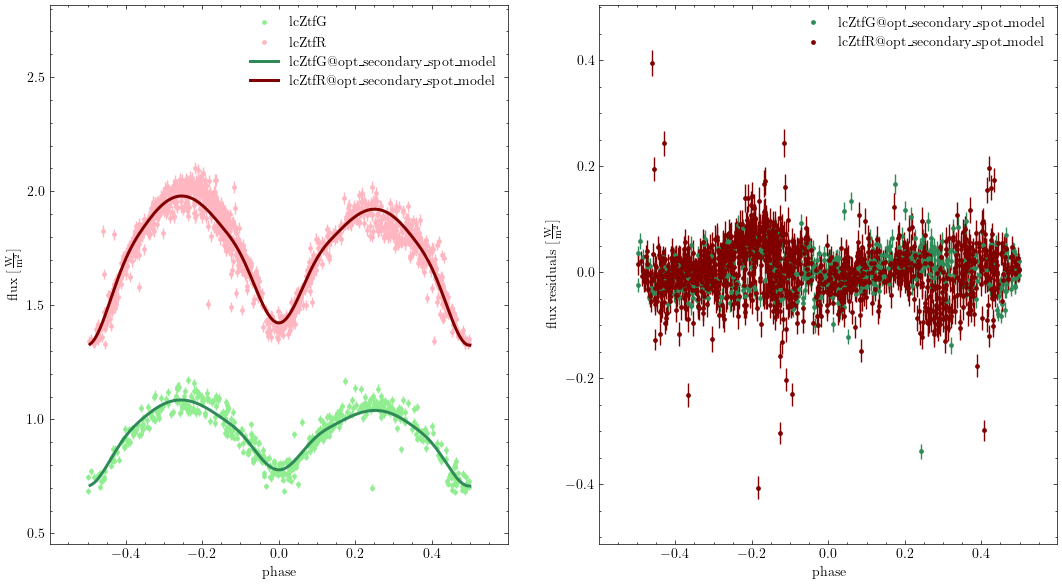

Sat, 03 Aug 2024 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.109282, assuming named color
Sat, 03 Aug 2024 09:30 PARAMETERS   WARNING could not find Parameter match for ec=face at time=00.109282, assuming named color


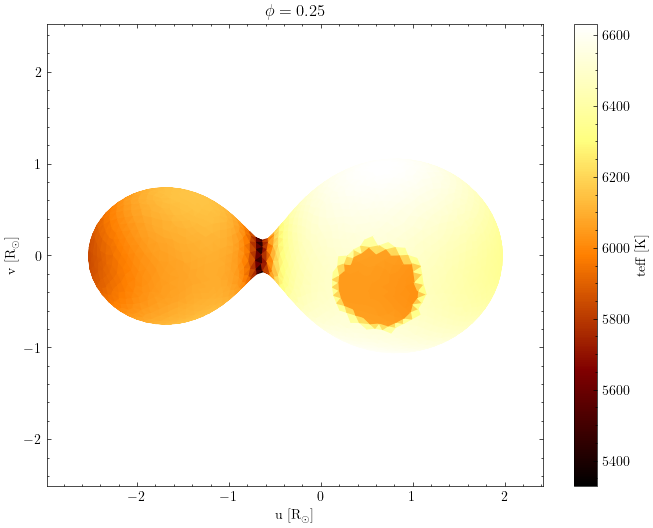

<Figure size 800x600 with 0 Axes>

In [145]:
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[ztfDatasets], model=computeModelName)
b.plot(dataset='mesh01', phase=plotPhase, model=computeModelName, fc='teffs', ec='face', show=True, draw_sidebars=True, title=fr"$\phi = {plotPhase}$", draw_title=True)
gen_utils.animateMesh(b, logger, model=computeModelName)

Sat, 03 Aug 2024 09:31 BUNDLE       WARNING not all uniqueids in fitted_uniqueids@opt_secondary_spot_solution@solution are still valid.  Falling back on twigs.  Save and load same bundle to prevent this extra cost.


Adopted:
colat@secondary_spot@secondary@spot@feature 89.77983 deg 
long@secondary_spot@secondary@spot@feature 81.09966 deg 
radius@secondary_spot@secondary@spot@feature 25.12086 deg 
relteff@secondary_spot@secondary@spot@feature 0.93007  

Original values:
  colat@secondary_spot@secondary@spot@feature 89.77983 deg 
  long@secondary_spot@secondary@spot@feature 81.09966 deg 
  radius@secondary_spot@secondary@spot@feature 25.12086 deg 
  relteff@secondary_spot@secondary@spot@feature 0.93007 


100%|██████████| 161/161 [00:36<00:00,  4.46it/s]


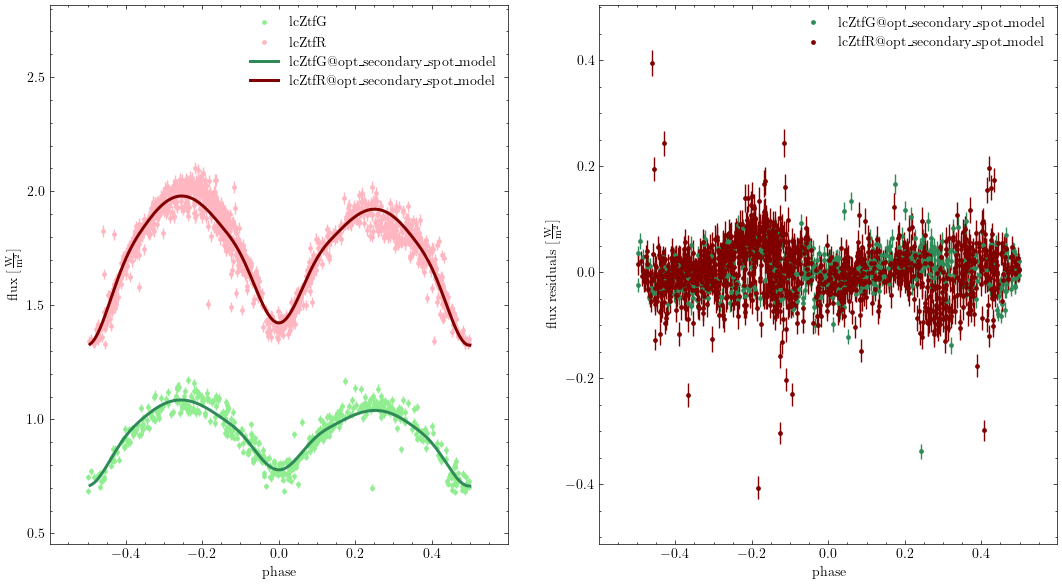

<Figure size 800x600 with 0 Axes>

In [146]:
gen_utils.abilitateDatasets(b, ztfDatasets)
# solutionName, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file="./external-jobs/iturbide-gaia-ztf-relative_norm/results/opt_secondary_spot_solution")
solutionName, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file="./external-jobs/updated-data/results/opt_secondary_spot_solution")
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[ztfDatasets], model=computeModelName)
gen_utils.animateMesh(b, logger, model=computeModelName)

100%|██████████| 246/246 [00:55<00:00,  4.40it/s]


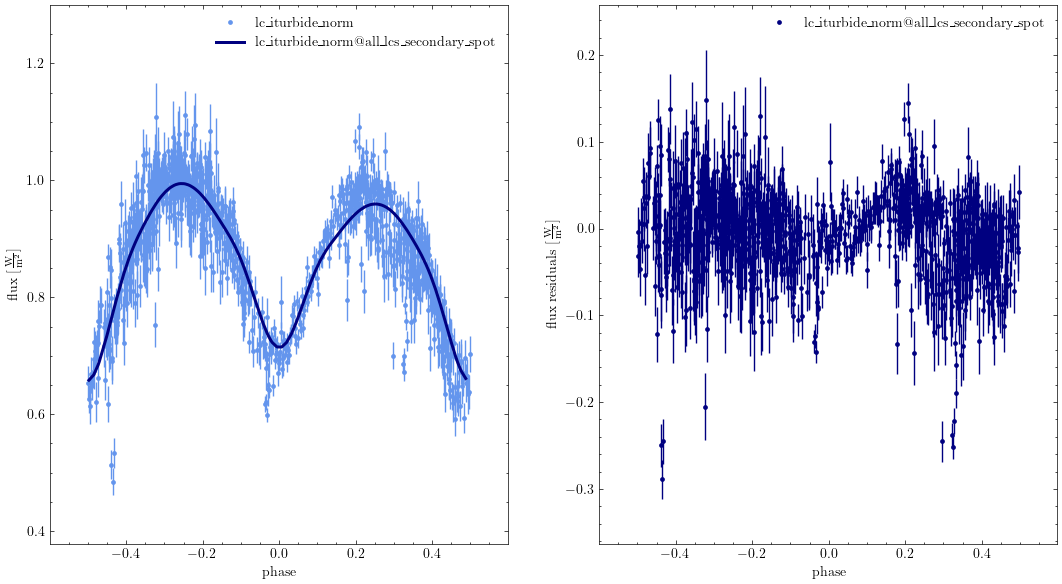

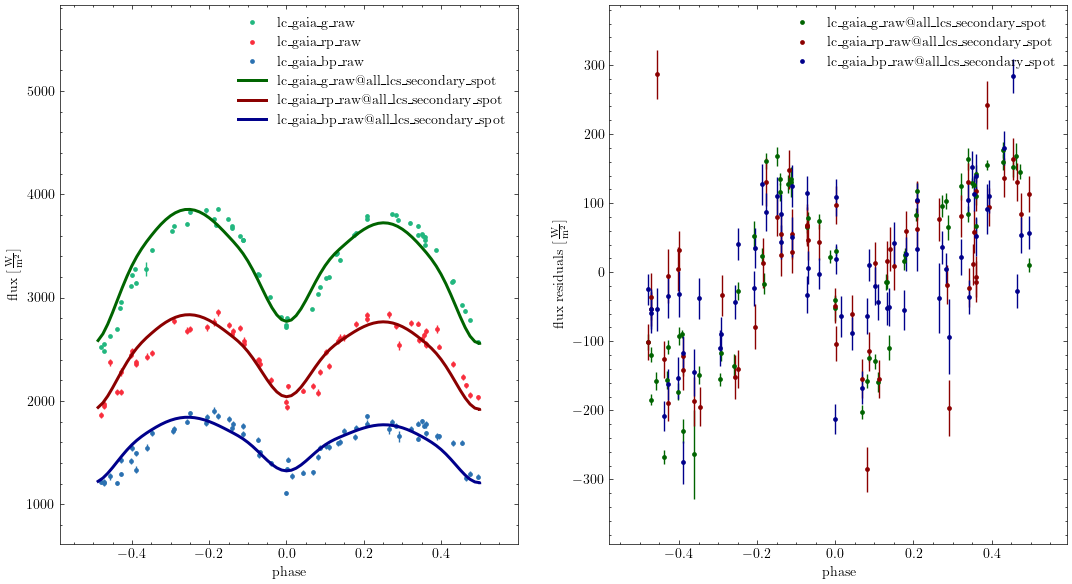

In [147]:
gen_utils.abilitateDatasets(b, rawGaiaDatasets + ['lc_iturbide_norm'])
b.run_compute(model='all_lcs_secondary_spot', overwrite=True)
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[['lc_iturbide_norm'], rawGaiaDatasets], model='all_lcs_secondary_spot')

In [148]:
gen_utils.printAllModelsChi2(b)

before_optimizers
	 Gaia (Raw) - 13179.391625955395
		 lc_gaia_g_raw - 11176.21383724974
		 lc_gaia_rp_raw - 996.3525261709403
		 lc_gaia_bp_raw - 1006.8252625347158
------------------------------------------------
	 Iturbide (Norm) - 5254.494483017592
------------------------------------------------
	 ZTF - 16143.529065239905
		 lcZtfG - 5244.7217304115175
		 lcZtfR - 10898.807334828387
poro_sample
	 Gaia (Raw) - 13198.730458784532
		 lc_gaia_g_raw - 11194.257842692314
		 lc_gaia_rp_raw - 996.4099934724072
		 lc_gaia_bp_raw - 1008.0626226198111
------------------------------------------------
	 Iturbide (Norm) - 5258.324832963756
------------------------------------------------
	 ZTF - 16171.886887637465
		 lcZtfG - 5263.060886486252
		 lcZtfR - 10908.826001151214
opt_t0_model
	 Gaia (Raw) - 12793.877039457688
		 lc_gaia_g_raw - 10827.301256273857
		 lc_gaia_rp_raw - 976.8565376779175
		 lc_gaia_bp_raw - 989.7192455059132
------------------------------------------------
	 Iturbide (No

# Differential Optimization Adjustments

Parameter optimization through differential techniques to get closer to parameter space minimum. Trying out both `differential_evolution` and `differential_correction` optimizers, of which DE optimizer will run on remote server to take advantage of the greater amount of threads available for heavy usage.

Opted for executing DC optimizer in notebook directly, since `differential_correction` is single-threaded and therefore benefits most from single core speed. Current servers have ancient CPUs, which, while having an enormous amount of threads to work with, are painfully slow for single-threaded tasks.

In [149]:
# original values

print(b['teffratio'])
print(b['incl@binary'])
print(b['fillout_factor'])

Parameter: teffratio@binary@component
                       Qualifier: teffratio
                     Description: ratio between effective temperatures of children stars
                           Value: 1.0799145032852362
                  Constrained by: 
                      Constrains: teff@secondary@component
                      Related to: teff@primary@component, teff@secondary@component

Parameter: incl@binary@component
                       Qualifier: incl
                     Description: Orbital inclination angle
                           Value: 70.19809817084013 deg
                  Constrained by: 
                      Constrains: asini@binary@component, asini@primary@component, incl@primary@component, asini@secondary@component, incl@secondary@component
                      Related to: sma@binary@component, asini@binary@component, q@binary@component, asini@primary@component, pitch@primary@component, incl@primary@component, asini@secondary@component, pitch@secondary

## Differential Corrections

In [150]:
beforeDcBackup = b.copy()

In [151]:
gen_utils.abilitateDatasets(b, ztfDatasets, False)
b.add_solver('optimizer.differential_corrections', solver='dc_relative', overwrite=True,
             fit_parameters=['teffratio', 'incl@binary', 'fillout_factor', 'q'],
             steps={
                'q': 0.01,
                'incl@binary': 1,
                'fillout_factor': 0.01,
                'teffratio': 0.01
             })
b.remove_models_all()
gen_utils.saveBundle(b, bundleName="dc-start", subfolder="updated-data/dc-opt")
b = beforeDcBackup.copy()

Sat, 03 Aug 2024 09:34 PARAMETERS   WARNING for faster compact saving, install ujson


In [152]:
# best results after 1 iteration
# dcFitVals = {
#     "teffratio@binary@orbit@component": 1.05923,
#     "incl@binary@orbit@component": 69.65312*u.deg,
#     "fillout_factor@contact_envelope@envelope@component": 0.11717,
#     "q@binary@orbit@component": 1.81910
# }

# technically best result after 17 iterations, but much different values for q
dcFitVals = {
    "teffratio@binary@orbit@component": 1.06676,
    "incl@binary@orbit@component": 68.42157*u.deg,
    "fillout_factor@contact_envelope@envelope@component": 0.07892,
    "q@binary@orbit@component": 1.10457
}

for twig, val in dcFitVals.items():
    b.set_value(twig, value=val)

b.set_value_all(qualifier='enabled', value=True)
b.run_compute(model='dc_best_solution_model', overwrite=True)

Sat, 03 Aug 2024 09:34 BUNDLE       ERROR   Constraint 'requiv@primary@star@constraint' raised the following error while attempting to solve for 'requiv@primary@star@component'.  Consider flipping the constraint or changing the value of one of ['pot@contact_envelope@envelope@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv@primary@star@component'] until the constraint succeeds.  Original error: potential > L1 critical value
Sat, 03 Aug 2024 09:34 BUNDLE       ERROR   Constraint 'requiv@secondary@star@constraint' raised the following error while attempting to solve for 'requiv@secondary@star@component'.  Consider flipping the constraint or changing the value of one of ['pot@contact_envelope@envelope@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv@secondary@star@component'] until the constraint succeeds.  Original error: potential > L1 critical value
100%|██████████| 386/386 [01:34<00:00,  4.08it/s]


<ParameterSet: 231 parameters | kinds: lc, mesh>

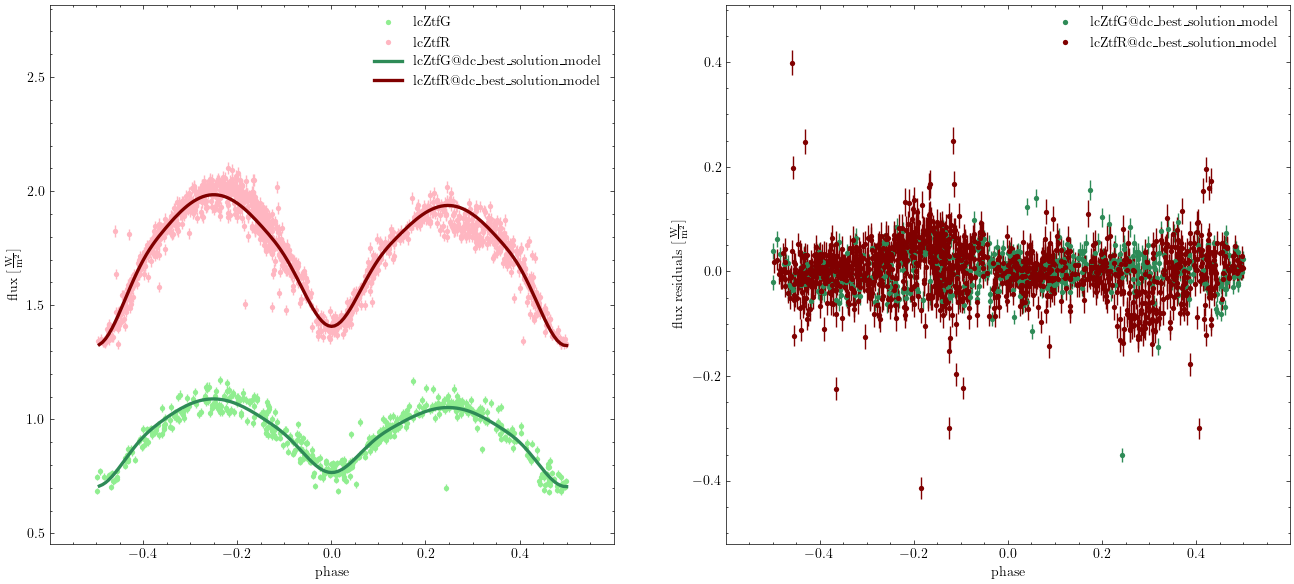

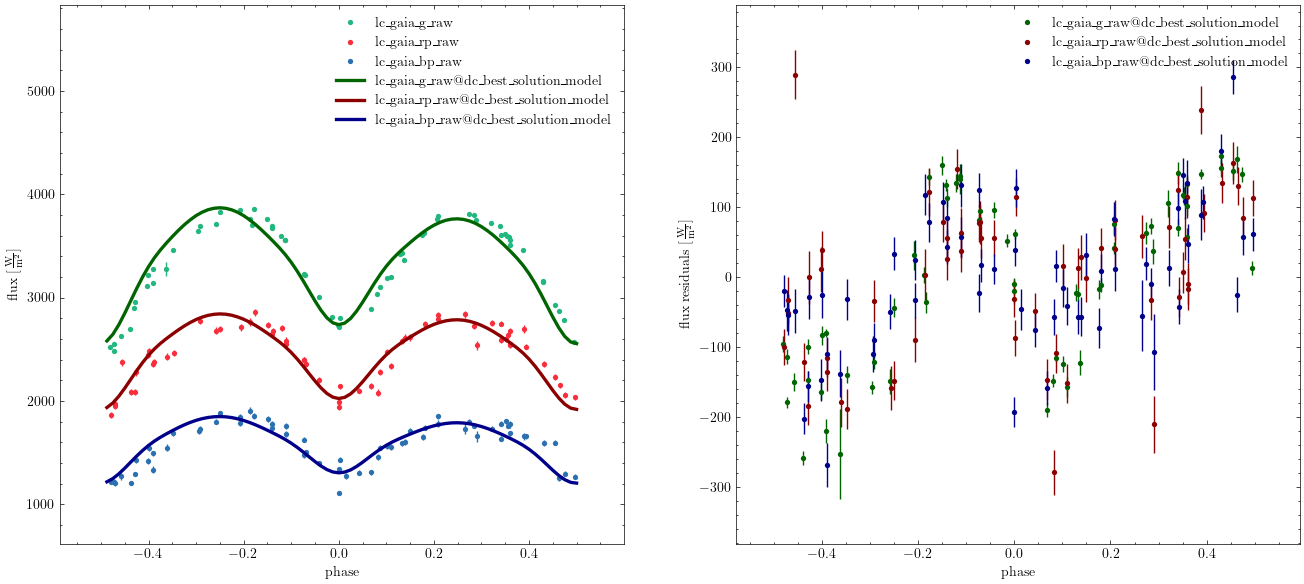

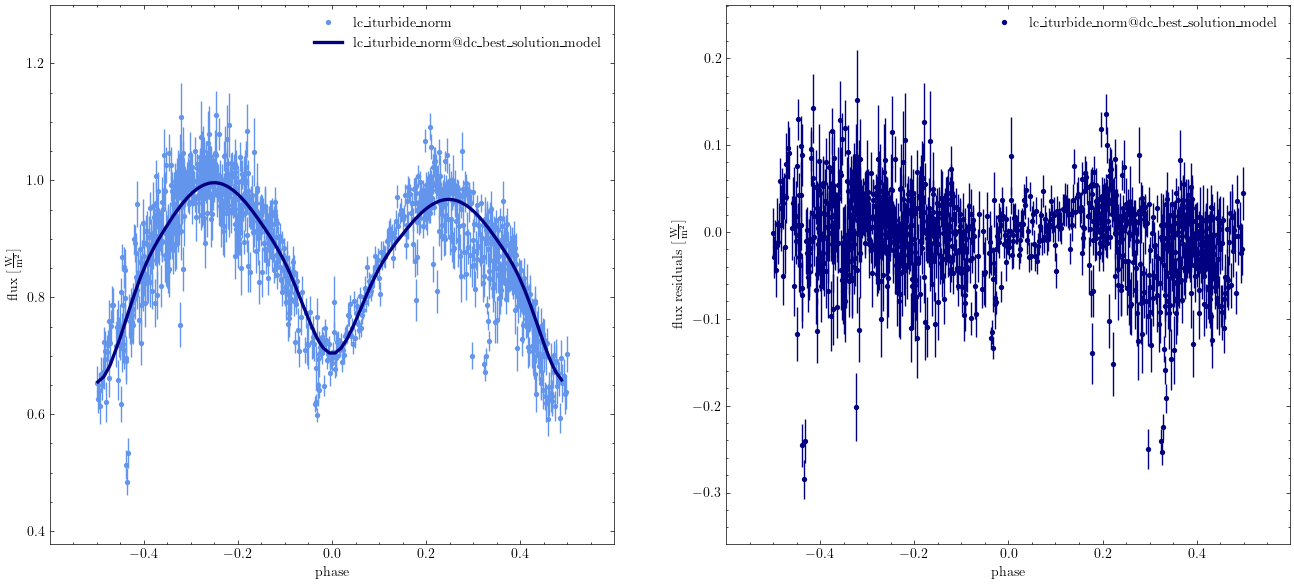

{'lcZtfG-lcZtfR': <Figure size 1600x700 with 2 Axes>,
 'lc_gaia_g_raw-lc_gaia_rp_raw-lc_gaia_bp_raw': <Figure size 1600x700 with 2 Axes>,
 'lc_iturbide_norm': <Figure size 1600x700 with 2 Axes>}

In [153]:
gen_utils.plotModelResidualsFigsize(b, figsize=(16, 7), datasetGroups=allDatasetPlotGroups, model='dc_best_solution_model')

In [154]:
gen_utils.printAllModelsChi2(b)

before_optimizers
	 Gaia (Raw) - 13179.391625955395
		 lc_gaia_g_raw - 11176.21383724974
		 lc_gaia_rp_raw - 996.3525261709403
		 lc_gaia_bp_raw - 1006.8252625347158
------------------------------------------------
	 Iturbide (Norm) - 5254.494483017592
------------------------------------------------
	 ZTF - 16143.529065239905
		 lcZtfG - 5244.7217304115175
		 lcZtfR - 10898.807334828387
poro_sample
	 Gaia (Raw) - 13198.730458784532
		 lc_gaia_g_raw - 11194.257842692314
		 lc_gaia_rp_raw - 996.4099934724072
		 lc_gaia_bp_raw - 1008.0626226198111
------------------------------------------------
	 Iturbide (Norm) - 5258.324832963756
------------------------------------------------
	 ZTF - 16171.886887637465
		 lcZtfG - 5263.060886486252
		 lcZtfR - 10908.826001151214
opt_t0_model
	 Gaia (Raw) - 12793.877039457688
		 lc_gaia_g_raw - 10827.301256273857
		 lc_gaia_rp_raw - 976.8565376779175
		 lc_gaia_bp_raw - 989.7192455059132
------------------------------------------------
	 Iturbide (No

In [155]:
gen_utils.animateMesh(b, logger, model='dc_best_solution_model')

<Figure size 800x600 with 0 Axes>

# Adjusting Component $T_{eff}$

Since these parameters are some of the last that will likely need to be adjusted for this model, here we try adjusting the component $T_{eff}$ using the color
difference from each set of light curves. The optimized temperatures will need to agree with Gaia and ZTF data, since this is where we have color information.

Will run 3 separate optimizers; one including normalized datasets only (+ZTF), one including raw datasets only (-ZTF), and one with raw datasets + ZTF normalized.

In [156]:
pb_backup = b.copy()

In [109]:
%%script echo "skip unless need to restore from backup"
b = pb_backup.copy()

skip unless need to restore from backup


In [157]:
# coupling Gaia color LCs to Gaia_G
b.set_value_all(qualifier='pblum_mode', dataset=['lc_gaia_rp_raw', 'lc_gaia_bp_raw'], value='dataset-coupled')
b.set_value_all(qualifier='pblum_dataset', dataset=['lc_gaia_rp_raw', 'lc_gaia_bp_raw'], value='lc_gaia_g_raw')

# coupling ZTF color to ZTF_G
b.set_value(qualifier='pblum_mode', dataset='lcZtfG', value='component-coupled')
b.set_value(qualifier='pblum_mode', dataset='lcZtfR', value='dataset-coupled')
b.set_value(qualifier='pblum_dataset', dataset='lcZtfR', value='lcZtfG')

100%|██████████| 221/221 [00:56<00:00,  3.92it/s]


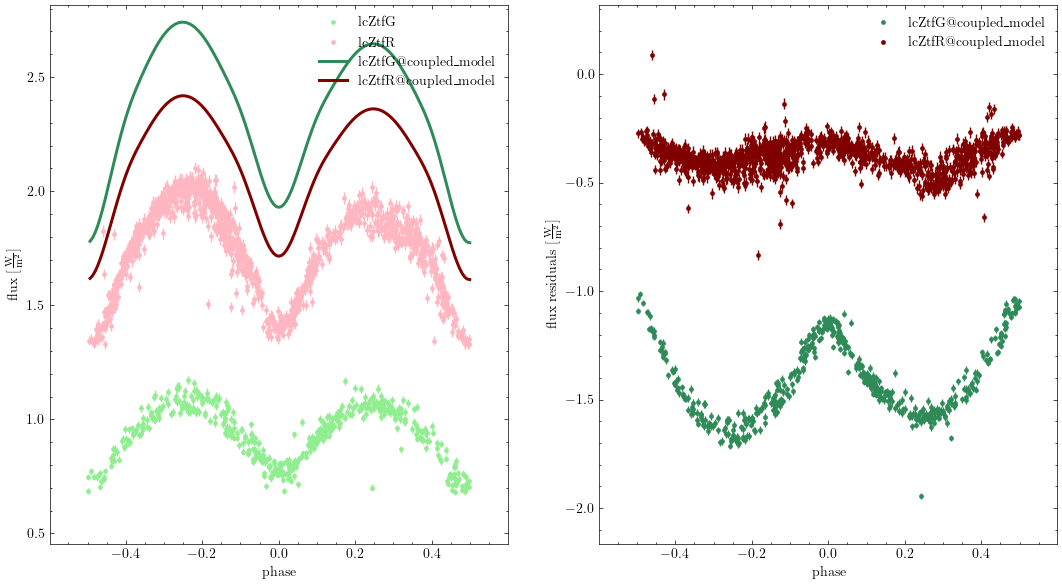

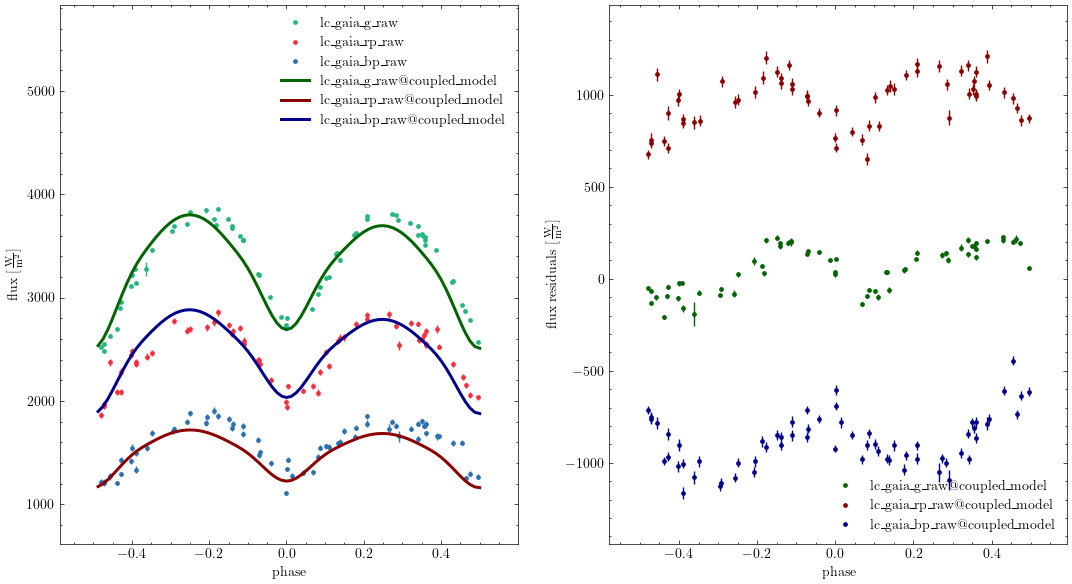

{'lcZtfG-lcZtfR': <Figure size 1300x700 with 2 Axes>,
 'lc_gaia_g_raw-lc_gaia_rp_raw-lc_gaia_bp_raw': <Figure size 1300x700 with 2 Axes>}

In [158]:
# b.set_value(qualifier='teff', component='primary', context='component', value=4600*u.K)
gen_utils.abilitateDatasets(b, ztfDatasets + rawGaiaDatasets)
b.run_compute(model='coupled_model', overwrite=True)
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[ztfDatasets, rawGaiaDatasets], model='coupled_model')

## Original Adjustment

Coupled all Gaia LCs together; **results in bad temperature adjustment**

In [112]:
%%script echo "skipping for following optimizer instead"
# normalized datasets; excluding Aviles norm (since it's a very sparse dataset)
opt_utils.optimize_params(b, label="teff_ff_pblum_iturbide_gaia_ztf_norm", export=True, subfolder="iturbide-gaia-ztf-relative_norm", overwrite_export=False,
						  fit_twigs=['teffratio', 'fillout_factor', 'teff@primary', 'pblum@primary@lc_gaia_g_norm', 'pblum@primary@lcZtfG', 'pblum@primary@lc_iturbide_norm'],
						  datasets=normGaiaDatasets + ztfDatasets + ['lc_iturbide_norm'], maxiter=500)

skipping for following optimizer instead


In [113]:
%%script echo "skipping for following optimizer instead"
solutionName, computeModelName = opt_utils.adopt_solution(b, 
													solution_file="./external-jobs/iturbide-gaia-ztf-relative_norm/results/opt_teff_ff_pblum_iturbide_gaia_ztf_norm_solution", 
													reset_params=True, dataset=['mesh01', 'lc_iturbide_norm'] + normGaiaDatasets + ztfDatasets)
gen_utils.plotModelResidualsFigsize(b, figsize=(17, 8), datasetGroups=[['lc_iturbide_norm'], normGaiaDatasets, ztfDatasets], model=computeModelName)
gen_utils.animateMesh(b, logger, model=computeModelName)

skipping for following optimizer instead


In [114]:
%%script echo "skipping for following optimizer instead"
# raw datasets only
opt_utils.optimize_params(b, label="teff_ff_pblum_iturbide_gaia_raw", export=True, subfolder="iturbide-gaia-ztf-ltt", 
						  fit_twigs=['teffratio', 'fillout_factor', 'teff@primary', 'pblum@primary@lc_gaia_g_raw', 'pblum@primary@lc_iturbide_raw'],
						  datasets=rawGaiaDatasets + ['lc_iturbide_raw'], maxiter=500)

skipping for following optimizer instead


In [115]:
%%script echo "skipping for following optimizer instead"
# raw + ZTF
opt_utils.optimize_params(b, label="teff_ff_pblum_iturbide_gaia_ztf_raw", export=True, subfolder="iturbide-gaia-ztf-ltt", 
						  fit_twigs=['teffratio', 'fillout_factor', 'teff@primary', 'pblum@primary@lc_gaia_g_raw', 'pblum@primary@lc_iturbide_raw', 'pblum@primary@lcZtfG'],
						  datasets=rawGaiaDatasets + ztfDatasets + ['lc_iturbide_raw'], maxiter=500)

skipping for following optimizer instead


## Adjusting Sets of Colors

3 different optimizers to determine component $T_{eff}$: using only Gaia color ($G - RP$ and $G - BP$), using only ZTF color ($G - R$), and one using both sets of light curves.

Only adjusting `teffratio`, `teff@primary`, and `pblum`; adjusting radii using `fillout_factor` should probably be done before changing passband scaling.

In [159]:
# ztf only
opt_utils.optimize_params(b, fit_twigs=['teffratio', 'teff@primary', 'pblum@primary@lcZtfG'], label='ztf_teff', export=True,overwrite_export=True,
						  datasets=ztfDatasets, subfolder='updated-data', maxiter=500)

# gaia + ztf; removed since Gaia is very affected by interstellar extinction
# opt_utils.optimize_params(b, fit_twigs=['teffratio', 'teff@primary'], label='gaia_g_ztf_teff', export=True, overwrite_export=True,
# 						  datasets=rawGaiaDatasets + trimmedZtfDatasets, subfolder='iturbide-gaia-ztf-relative_norm', maxiter=500)

External Solver: ./external-jobs/updated-data/optimizer.nelder_mead_opt_ztf_teff.py ./results/opt_ztf_teff_solution


('opt_ztf_teff', 'opt_ztf_teff_solution')

In [117]:
%%script echo "skipping; not optimizing gaia datasets"

# gaia + ztf
gen_utils.abilitateDatasets(b, rawGaiaDatasets + ztfDatasets)
solutionName, computeModelName = opt_utils.adopt_solution(b, solution_file="./external-jobs/iturbide-gaia-ztf-relative_norm/results/opt_gaia_g_ztf_teff_solution", reset_params=True)
gen_utils.printChi2(b, computeModelName)
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[rawGaiaDatasets, ztfDatasets], model=computeModelName)
gen_utils.animateMesh(b, logger, model=computeModelName)

skipping; not optimizing gaia datasets


Adopted:
teffratio@binary@orbit@component 1.05213  
teff@primary@star@component 4203.69115 K 
pblum@primary@lcZtfG@lc@dataset 4.78643 W 

Original values:
  teffratio@binary@orbit@component 1.06676 
  teff@primary@star@component 6000.00000 K 
  pblum@primary@lcZtfG@lc@dataset 12.56637 W 


100%|██████████| 221/221 [00:54<00:00,  4.03it/s]


ParameterSet: 11 parameters
R  fitted_twigs@opt_ztf_teff@o...: ['teffratio@binary@orbit@component' 'teff@primary@star@component'
 'pblum@primary@lcZtfG@lc@dataset']
   adopt_parameters@opt_ztf_te...: ['teffratio@binary@orbit@component', 'teff@primary@star@component', 'pblum@primary@lcZtfG@lc@dataset']
   adopt_distributions@opt_ztf...: False
   adopt_values@opt_ztf_teff@o...: True
R  message@opt_ztf_teff@opt_zt...: Optimization terminated successfully.
R  niter@opt_ztf_teff@opt_ztf_...: 174
R  success@opt_ztf_teff@opt_zt...: True
R  initial_values@opt_ztf_teff...: [1.06676 6000.0 12.566370614359172]
R  fitted_values@opt_ztf_teff@...: [1.0521319006279142 4203.691151764369 4.786429344627436]
R  fitted_units@opt_ztf_teff@o...: ['' 'K' 'W']
   comments@opt_ztf_teff@opt_z...: 
opt_ztf_teff_model
	 Gaia (Raw) - 16420.114838666603
		 lc_gaia_g_raw - 8017.037094959718
		 lc_gaia_rp_raw - 2996.7688572666243
		 lc_gaia_bp_raw - 5406.308886440262
------------------------------------------------
-

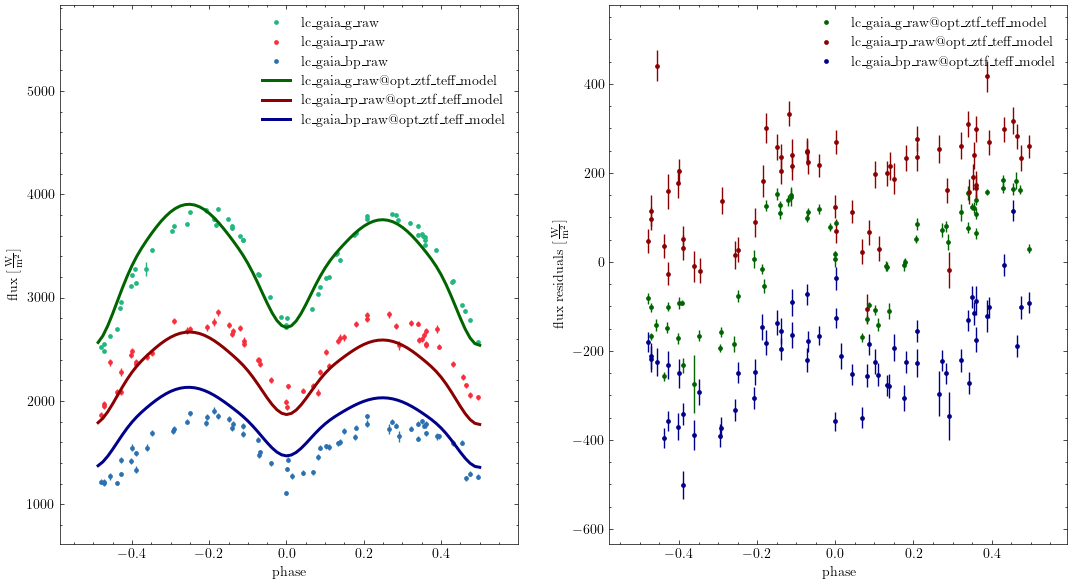

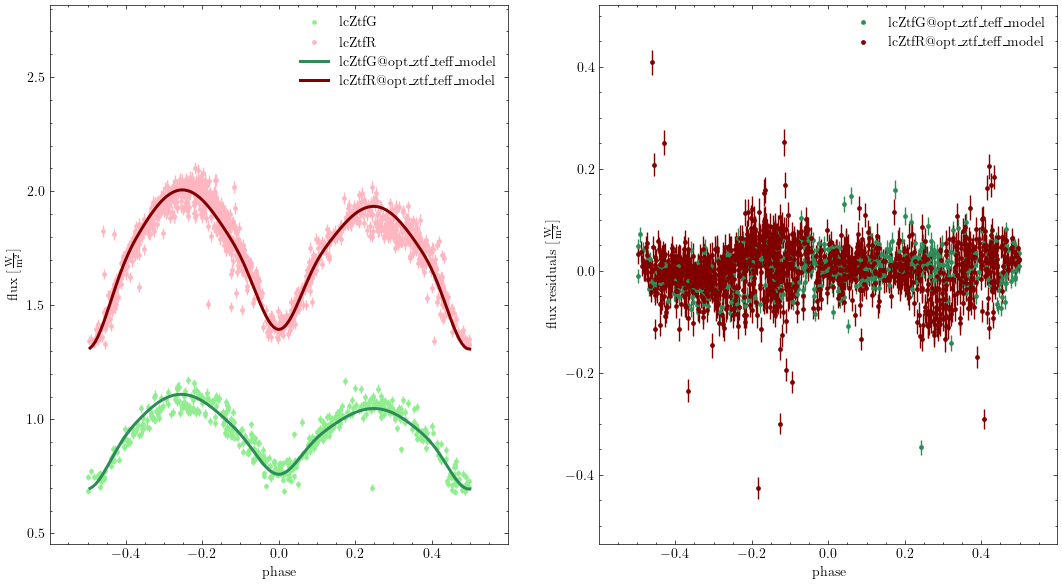

<Figure size 800x600 with 0 Axes>

In [160]:
# ztf only; gaia seems to be affected by ISM extinction
gen_utils.abilitateDatasets(b, rawGaiaDatasets + ztfDatasets)

solutionName, computeModelName = opt_utils.adopt_solution(b, solution_file="./external-jobs/updated-data/results/opt_ztf_teff_solution", reset_params=False)
print(b['teff@secondary'])
print(b['opt_ztf_teff_solution'])
gen_utils.printChi2(b, computeModelName)
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[rawGaiaDatasets, ztfDatasets], model=computeModelName)
gen_utils.animateMesh(b, logger, model=computeModelName, color='inferno')

## Iturbide

In [ ]:
%%script echo "skipping; won't be using this light curve for sampling"

# norm full
solutionPath = gen_solution_path('iturbide_norm_pblum_local')
if not os.path.exists(solutionPath):
	_, solutionName = opt_utils.optimize_params(b, ['pblum@primary@lc_iturbide_norm@dataset'], label='iturbide_norm_pblum', export=False, datasets=['lc_iturbide_norm'], maxiter=40)
	b.filter(context='solution', solution=solutionName, check_visible=False).save(solutionPath, incl_uniqueid=True)

_, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file=solutionPath)
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=['lc_iturbide_norm'], model=computeModelName)

skipping; keeping dataset-scaled for main datasets, avoiding adjusting for passband luminosity


In [ ]:
%%script echo "skipping; won't be using this light curve for sampling"

# norm Aviles
solutionPath = gen_solution_path('iturbide_aviles_norm_pblum_local')
if not os.path.exists(solutionPath):
	_, solutionName = opt_utils.optimize_params(b, ['pblum@primary@lc_iturbide_aviles_norm@dataset'], label='iturbide_aviles_norm_pblum', export=False, 
											 	datasets=['lc_iturbide_aviles_norm'], maxiter=40)
	b.filter(context='solution', solution=solutionName, check_visible=False).save(solutionPath, incl_uniqueid=True)

_, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file=solutionPath)
_ = gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=['lc_iturbide_aviles_norm'], model=computeModelName)

skipping; keeping dataset-scaled for main datasets, avoiding adjusting for passband luminosity


## Gaia

In [ ]:
b.set_value(qualifier='pblum_mode', dataset='lc_gaia_g_raw', value='component-coupled')

100%|██████████| 40/40 [23:46<00:00, 35.67s/it]


Adopted:
pblum@primary@lc_gaia_g_raw@lc@dataset 13823.37031 W 

Original values:
  pblum@primary@lc_gaia_g_raw@lc@dataset 12.56637 W 


100%|██████████| 81/81 [00:20<00:00,  4.02it/s]


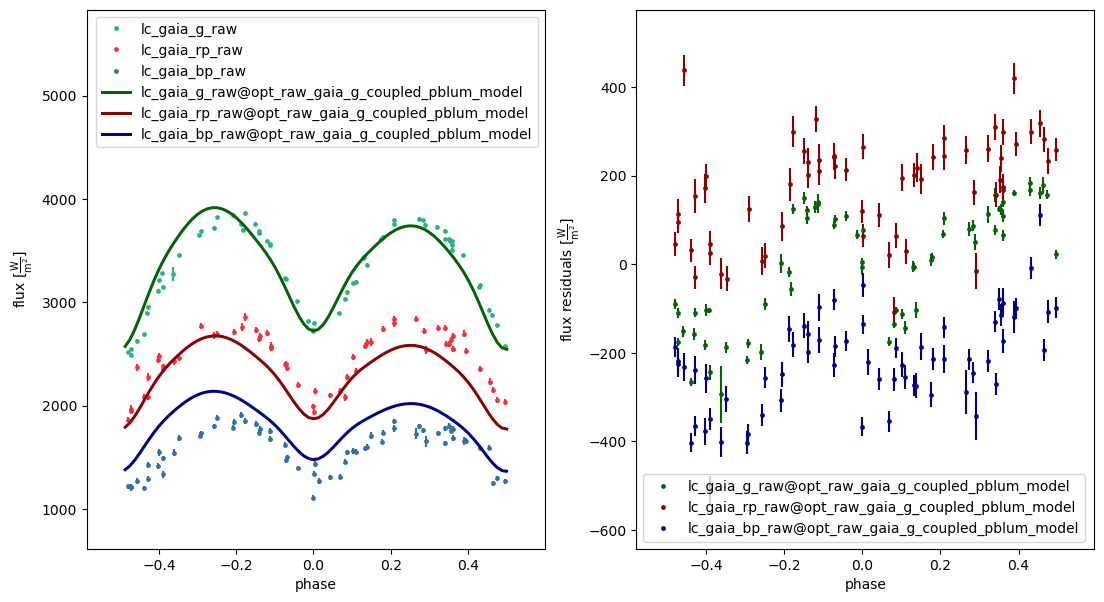

{'lc_gaia_g_raw-lc_gaia_rp_raw-lc_gaia_bp_raw': <Figure size 1300x700 with 2 Axes>}

In [ ]:
# optimize passband luminosity
# solutionPath = gen_solution_path('raw_gaia_g_coupled_pblum_local')
solutionPath = "./external-jobs/updated-data/results/raw_gaia_g_coupled_pblum_local"
if not os.path.exists(solutionPath):
	_, solutionName = opt_utils.optimize_params(b, ['pblum@primary@lc_gaia_g_raw@dataset'], label='raw_gaia_g_coupled_pblum', export=False, 
											 	datasets=['lc_gaia_g_raw'], maxiter=40)
	b.filter(context='solution', solution=solutionName, check_visible=False).save(solutionPath, incl_uniqueid=True)

gen_utils.abilitateDatasets(b, rawGaiaDatasets)
_, computeModelName = opt_utils.adopt_solution(b, reset_params=False, solution_file=solutionPath)
gen_utils.plotModelResidualsFigsize(b, figsize=(13, 7), datasetGroups=[rawGaiaDatasets], model=computeModelName)

# Clean Up Bundle

Remove models, datasets, and solutions that are no longer useful. Reduce bundle size for loading into MCMC sampling phase.

In [161]:
b.models, b.datasets, b.solutions

(['before_optimizers',
  'poro_sample',
  'opt_t0_model',
  'opt_nm_all_model',
  'updated_mesh_phases',
  'secondary_spot_check',
  'opt_secondary_spot_model',
  'all_lcs_secondary_spot',
  'dc_best_solution_model',
  'coupled_model',
  'opt_ztf_teff_model'],
 ['mesh01',
  'lc_iturbide_norm',
  'lc_gaia_g_raw',
  'lc_gaia_rp_raw',
  'lc_gaia_bp_raw',
  'lcZtfG',
  'lcZtfR'],
 ['ebai_knn_all_solution',
  'ebai_knn_ztf_gaia_solution',
  'ebai_knn_iturbide_solution',
  'ebai_knn_iturbide_ztf_solution',
  'ebai_knn_ztf_solution',
  'ebai_knn_raw_gaia_solution',
  'opt_nm_all_solution',
  'opt_secondary_spot_solution',
  'opt_ztf_teff_solution'])

In [162]:
b.remove_solutions_all()
b.remove_models_all()

keepDatasets = ['mesh01', 'lc_iturbide_norm'] + rawGaiaDatasets + ztfDatasets
for d in b.datasets:
	if d not in keepDatasets:
		b.remove_dataset(d)

b.models, b.datasets, b.solutions

([],
 ['mesh01',
  'lc_iturbide_norm',
  'lc_gaia_g_raw',
  'lc_gaia_rp_raw',
  'lc_gaia_bp_raw',
  'lcZtfG',
  'lcZtfR'],
 [])

In [163]:
gen_utils.saveBundle(b, bundleName="post-optimizers", subfolder="updated-data")

Sat, 03 Aug 2024 12:47 PARAMETERS   WARNING for faster compact saving, install ujson


'bundle-saves/updated-data/post-optimizers.json.gz'

# Testing Interstellar Extinction

In [3]:
# b = phoebe.load("./bundle-saves/iturbide-gaia-ztf-relative_norm/post-optimizers")
b = gen_utils.loadBundle("post-optimizers")

In [4]:
print(b['ebv'])
print(b['Av'])
print(b['Rv'])
print(b['distance'])

ParameterSet: 2 parameters
C                      ebv@system: 0.0
                   ebv@constraint: {Av@system} / {Rv@system}
Parameter: Av@system
                       Qualifier: Av
                     Description: Extinction Av
                           Value: 0.0
                  Constrained by: 
                      Constrains: ebv@system
                      Related to: Rv@system, ebv@system

Parameter: Rv@system
                       Qualifier: Rv
                     Description: Extinction law parameter
                           Value: 3.1
                  Constrained by: 
                      Constrains: ebv@system
                      Related to: Av@system, ebv@system

Parameter: distance@system
                       Qualifier: distance
                     Description: Distance to the system
                           Value: 1.0 m
                  Constrained by: 
                      Constrains: None
                      Related to: None



100%|██████████| 1075/1075 [02:41<00:00,  6.67it/s]


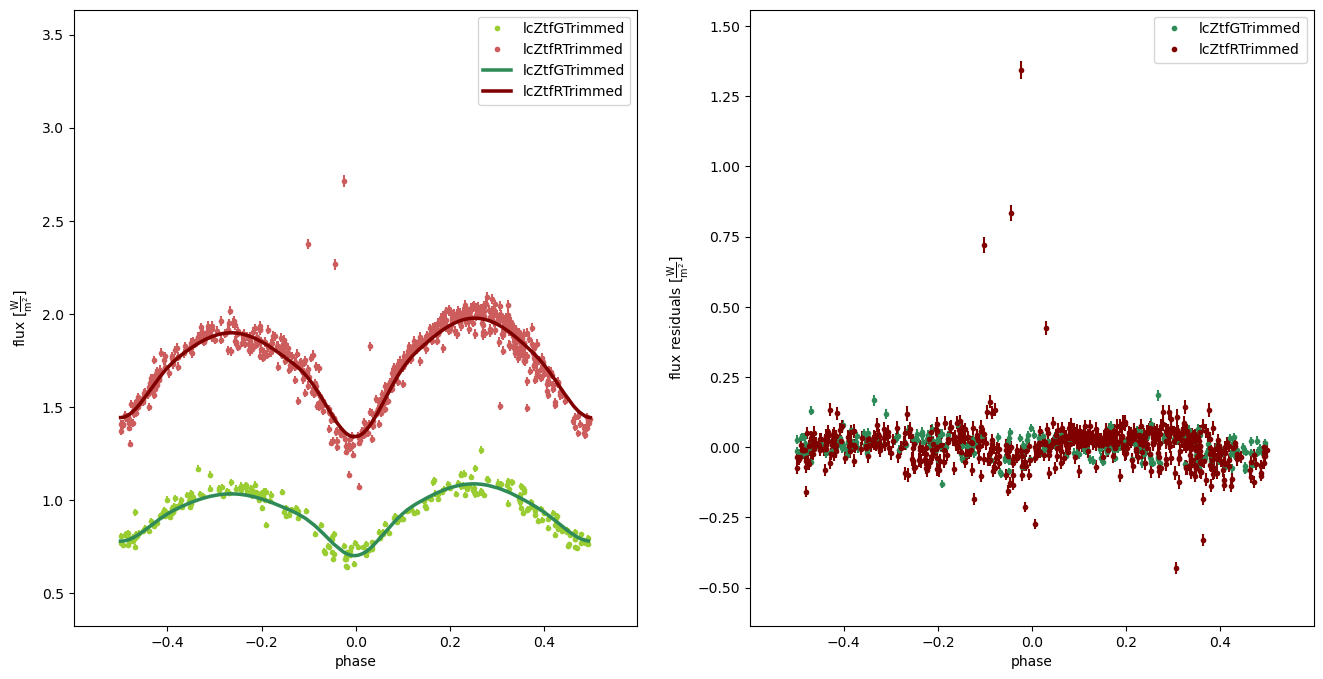

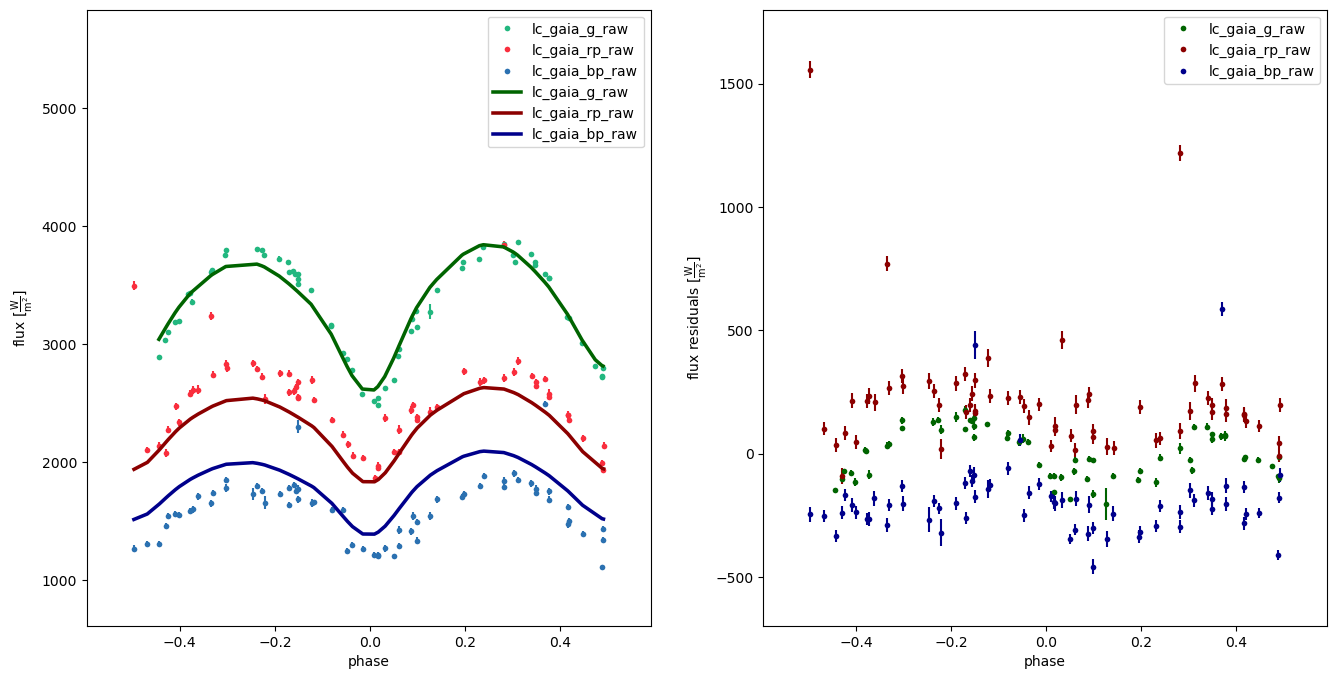

{'lcZtfGTrimmed-lcZtfRTrimmed': <Figure size 1600x800 with 2 Axes>,
 'lc_gaia_g_raw-lc_gaia_rp_raw-lc_gaia_bp_raw': <Figure size 1600x800 with 2 Axes>}

In [6]:
gen_utils.abilitateDatasets(b, trimmedZtfDatasets + rawGaiaDatasets)
b.run_compute(model='no_extinction_model', overwrite=True)
gen_utils.plotModelResidualsFigsize(b, figsize=(16, 8), datasetGroups=[trimmedZtfDatasets, rawGaiaDatasets], model='no_extinction_model')

In [4]:
b.flip_constraint(qualifier='ebv', solve_for='Av')

<ConstraintParameter: {Av@system} = {Rv@system} * {ebv@system} (solar units) => 0.0>

In [5]:
# Schlafly & Finkbeiner 2011 (ApJ 737, 103)
	# uses R = 3.1 (average galactic extinction)
# b.set_value(qualifier='ebv', value=0.1256) # IRSA SF (2011) mean: https://irsa.ipac.caltech.edu/cgi-bin/bgTools/nph-bgExec
# b.set_value(qualifier='ebv', value=0.1312) # IRSA SF (2011) max value
# b.set_value(qualifier='ebv', value=0.1238) # IRSA SF (2011) min value

# b.set_value(qualifier='ebv', value=0.1460) # IRSA SFD (1998) mean
b.set_value(qualifier='ebv', value=0.1526) # IRSA SFD (1998) max

# distance from Bailer -Jones (2021)
# b.set_value(qualifier='distance', value=2256.9956*u.pc)

In [8]:
b.set_value_all(qualifier='atm', value='phoenix')
print(b['atm@primary'])

Parameter: atm@primary@phoebe01@compute
                       Qualifier: atm
                     Description: Atmosphere table
                           Value: phoenix
                         Choices: phoenix, extern_planckint, blackbody, extern_atmx, ck2004
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [72]:
b.remove_dataset('lc_iturbide_norm')
b.remove_dataset('lc_iturbide_aviles_norm')
b.remove_dataset('lcZtfG')
b.remove_dataset('lcZtfR')
b.remove_dataset('lcZtfGTrimmed')
b.remove_dataset('lcZtfRTrimmed')

<ParameterSet: 47 parameters | contexts: figure, dataset, constraint, compute>

In [64]:
print(b['ebv'])
print(b['Av'])
print(b['Rv'])
print(b['distance'])

Parameter: ebv@system
                       Qualifier: ebv
                     Description: Extinction E(B-V)
                           Value: 0.1526
                  Constrained by: 
                      Constrains: Av@system
                      Related to: Av@system, Rv@system

ParameterSet: 2 parameters
C                       Av@system: 0.38378
                    Av@constraint: {Rv@system} * {ebv@system}
Parameter: Rv@system
                       Qualifier: Rv
                     Description: Extinction law parameter
                           Value: 3.1
                  Constrained by: 
                      Constrains: Av@system
                      Related to: Av@system, ebv@system

Parameter: distance@system
                       Qualifier: distance
                     Description: Distance to the system
                           Value: 1.0 m
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [9]:
# TODO: run when on wifi
gen_utils.abilitateDatasets(b, rawGaiaDatasets)
b.run_compute(model='s_f_extinction_model', overwrite=True)
gen_utils.plotModelResidualsFigsize(b, figsize=(16, 8), datasetGroups=[rawGaiaDatasets], model='s_f_extinction_model')

Fri, 05 Jul 2024 12:35 BUNDLE       WARNING updating installed Gaia:G passband (with matching online timestamp) to include content=['phoenix:ext']
Fri, 05 Jul 2024 12:35 PASSBANDS    WARNING passband 'Gaia:G' already exists with local=True... removing
Fri, 05 Jul 2024 12:35 PASSBANDS    WARNING deleting file: /home/ramon/.phoebe/atmospheres/tables/passbands/gaia_g.fits
/home/ramon/anaconda3/envs/mapta-tesis/lib/python3.12/site-packages/phoebe/atmospheres/passbands.py:586: SyntaxWarning: invalid escape sequence '\i'
  """
/home/ramon/anaconda3/envs/mapta-tesis/lib/python3.12/site-packages/phoebe/atmospheres/passbands.py:612: SyntaxWarning: invalid escape sequence '\i'
  """
/home/ramon/anaconda3/envs/mapta-tesis/lib/python3.12/site-packages/phoebe/atmospheres/passbands.py:1692: SyntaxWarning: invalid escape sequence '\i'
  """
/home/ramon/anaconda3/envs/mapta-tesis/lib/python3.12/site-packages/phoebe/atmospheres/passbands.py:1739: SyntaxWarning: invalid escape sequence '\p'
  """
/home/

KeyboardInterrupt: 

In [66]:
if 'opt_pblum_ext' in b.solvers:
	b.remove_solver('opt_pblum_ext')
	b.remove_solution('opt_pblum_ext_solution')
opt_utils.optimize_params(b, fit_twigs=['pblum@primary@lc_gaia_g_raw'], label='pblum_ext', export=False, datasets=['lc_gaia_g_raw'], maxiter=5)

Mon, 22 Apr 2024 22:00 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
  0%|          | 0/5 [00:00<?, ?it/s]Mon, 22 Apr 2024 22:00 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
Mon, 22 Apr 2024 22:00 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
Mon, 22 Apr 2024 22:01 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
Mon, 22 Apr 2024 22:01 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.
 40

('opt_pblum_ext', 'opt_pblum_ext_solution')

In [67]:
print(b['opt_pblum_ext_solution'])

ParameterSet: 11 parameters
R  fitted_twigs@opt_pblum_ext_...: ['pblum@primary@lc_gaia_g_raw@lc@dataset']
   adopt_parameters@opt_pblum_...: ['pblum@primary@lc_gaia_g_raw@lc@dataset']
   adopt_distributions@opt_pbl...: False
   adopt_values@opt_pblum_ext_...: True
R  message@opt_pblum_ext_solut...: Maximum number of iterations has been exceeded.
R  niter@opt_pblum_ext_solutio...: 5
R  success@opt_pblum_ext_solut...: False
R  initial_values@opt_pblum_ex...: [19809.36339099145]
R  fitted_values@opt_pblum_ext...: [19809.36339099145]
R  fitted_units@opt_pblum_ext_...: ['W']
   comments@opt_pblum_ext_solu...: 


Adopted:
pblum@primary@lc_gaia_g_raw@lc@dataset 19809.36339 W 

Original values:


Mon, 22 Apr 2024 19:20 PASSBANDS    WARNING Online passbands unavailable (reached max tries).  Pass refresh=True to force another attempt or repeat_errors=False to avoid showing this message.


  pblum@primary@lc_gaia_g_raw@lc@dataset 19871.46171 W 


100%|██████████| 217/217 [00:32<00:00,  6.59it/s]


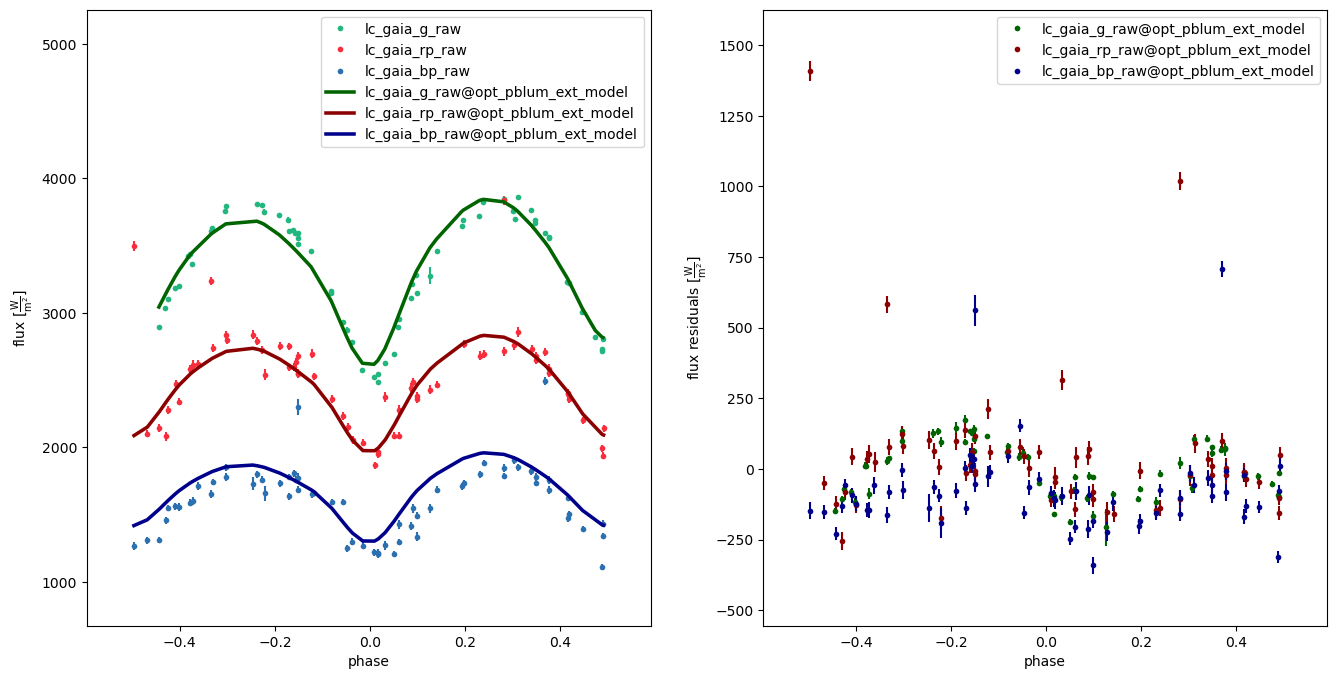

{'lc_gaia_g_raw-lc_gaia_rp_raw-lc_gaia_bp_raw': <Figure size 1600x800 with 2 Axes>}

In [52]:
gen_utils.abilitateDatasets(b, rawGaiaDatasets)
solutionName, computeModelName = opt_utils.adopt_solution(b, label='pblum_ext', reset_params=False)
gen_utils.plotModelResidualsFigsize(b, figsize=(16, 8), datasetGroups=[rawGaiaDatasets], model=computeModelName)